# Classification Example

## Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, make_scorer

# Validation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Load Data

In [4]:

df = pd.read_csv('data/bank/bank_data_preprocessed.csv')

# Opzione 1: Mostra tutte le colonne temporaneamente
pd.set_option('display.max_columns', None)

df.head()

,id,split,default,housing,loan,day,pdays,previous,y,age_group,campaign_intensity,duration_category,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,education_ordinal,has_education,contact_cellular,contact_unknown,marital_divorced,marital_single,poutcome_failure,poutcome_other,poutcome_success,balance_category_ordinal,economic_profile_ordinal,contact_history_ordinal,season_ordinal
0,1,labeled,0,0,0,28,-1,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,3,1,1,0,0,0,0,0,0,2,0,0,3
1,2,labeled,0,1,0,20,-1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,3,1,0,2
2,3,labeled,0,1,0,7,-1,0,0,2,1,1,0,1,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,2,1,0,3
3,4,labeled,0,1,0,14,-1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,2,1,0,1,1,0,0,0,0,3,1,0,2
4,5,labeled,0,1,0,5,-1,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,2,1,1,0,0,1,0,0,0,2,1,0,2


In [5]:
df.shape

(3063, 35)

## Split Column

In [82]:
leaderboard_df = df[df['split'] == 'leaderboard'].copy()
df = df[df['split'] == 'labeled']

In [83]:
# Verifica che i dati siano stati divisi correttamente
print(f"Shape leaderboard_df: {leaderboard_df.shape}")
print(f"Shape df (labeled): {df.shape}")
print(f"\nValori unici in 'split' di leaderboard_df: {leaderboard_df['split'].unique()}")
print(f"Valori unici in 'split' di df: {df['split'].unique()}")
print(f"\nTotale righe: {leaderboard_df.shape[0] + df.shape[0]}")


Shape leaderboard_df: (0, 35)
Shape df (labeled): (2007, 35)

Valori unici in 'split' di leaderboard_df: []
Valori unici in 'split' di df: ['labeled']

Totale righe: 2007


Spiegazione:

leaderboard_df contiene solo le righe dove split='leaderboard'
df contiene solo le righe dove split='labeled'

In pratica, hai diviso il dataset originale in due parti separate in base al valore della colonna split:

Una parte (leaderboard) probabilmente è il set di test/validazione finale
L'altra parte (labeled) è quella che userai per il training

È come se avessi preso una tabella e l'avessi separata in due tabelle distinte, ognuna con un gruppo specifico di dati. Nessuna riga è presente in entrambi i DataFrame - la separazione è pulita.

# Train / test split
Keep test split totally isolated from cross-validation.

In [8]:
target_ft = 'y'
fts2drop = ['id', 'split', target_ft]


In [9]:
# Codice di verifica
print(f"Colonne da eliminare: {fts2drop}")
print(f"\nQueste colonne esistono nel DataFrame?")
for col in fts2drop:
    print(f"  '{col}': {col in df.columns}")

print(f"\nColonne totali nel df: {len(df.columns)}")
print(f"Colonne che rimarranno dopo il drop: {len(df.columns) - len([col for col in fts2drop if col in df.columns])}")


Colonne da eliminare: ['id', 'split', 'y']

Queste colonne esistono nel DataFrame?
  'id': True
  'split': True
  'y': True

Colonne totali nel df: 35
Colonne che rimarranno dopo il drop: 32


In [10]:
X = df.drop(columns=fts2drop)
y = df[target_ft]

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

# Verifica
print(f"Shape X_train: {X_train.shape}") # esperimenti usare questo
print(f"Shape y_train: {y_train.shape}") # esperimenti usare questo
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

print(f"\nPercentuale train: {len(X_train) / len(X) * 100:.1f}%")
print(f"Percentuale test: {len(X_test) / len(X) * 100:.1f}%")

print(f"\nDistribuzione y_train:\n{y_train.value_counts(normalize=True)}")
print(f"\nDistribuzione y_test:\n{y_test.value_counts(normalize=True)}")

Shape X_train: (1605, 32)
Shape y_train: (1605,)
Shape X_test: (402, 32)
Shape y_test: (402,)

Percentuale train: 80.0%
Percentuale test: 20.0%

Distribuzione y_train:
y
0    0.913396
1    0.086604
Name: proportion, dtype: float64

Distribuzione y_test:
y
0    0.912935
1    0.087065
Name: proportion, dtype: float64


Separato features e target:

X = tutte le colonne tranne 'y' (le variabili per fare la predizione)
y = solo la colonna target (la variabile da predire)


Diviso train/test (80/20):

80% dei dati → training (per addestrare il modello)
20% dei dati → test (per validare il modello su dati mai visti)


stratify=y → mantiene le stesse proporzioni delle classi in train e test (importante per dataset sbilanciati)
random_state=42 → rende la divisione riproducibile (stesso risultato ogni volta)

## Cross-validation

In [11]:
df[target_ft].value_counts()

y
0    1833
1     174
Name: count, dtype: int64



Differenza importante:

df['target_ft'] → cerca una colonna chiamata letteralmente "target_ft"

df[target_ft] → usa il contenuto della variabile, quindi df['y']

È come la differenza tra dire "dammi il contenuto della scatola chiamata target_ft" vs "dammi il contenuto della scatola il cui nome è scritto sul foglietto target_ft (che dice 'y')".

In [12]:
# Declare KFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [13]:
# Declare scores to be used
scoring = {
    'Acc': make_scorer(accuracy_score),
    'Balanced_Acc': make_scorer(balanced_accuracy_score),
    'Prec': make_scorer(precision_score),
    'Rec': make_scorer(recall_score)
}

## funzioni generali

In [14]:
def print_metrics(cv_results):
    for sc in scoring.keys():
        print(f'Train {sc}:', cv_results[f'train_{sc}'].mean().round(2))
    print()
    for sc in scoring.keys():
        print(f'Validation {sc}:', cv_results[f'test_{sc}'].mean().round(2))

## Baseline

In [15]:
from sklearn.dummy import DummyClassifier

In [16]:
bl = DummyClassifier(strategy='stratified')
bl_cv = cross_validate(bl, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(bl_cv)

Train Acc: 0.84
Train Balanced_Acc: 0.5
Train Prec: 0.08
Train Rec: 0.08

Validation Acc: 0.84
Validation Balanced_Acc: 0.5
Validation Prec: 0.09
Validation Rec: 0.09


## Logistic Regression (PROFESSOR)

In [59]:
lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=10_000))
])
lr_cv = cross_validate(lr, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(lr_cv)

Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68


5. Logistic Regression

• Train multiple logistic regression models varying the penalty . Plot their performances in train
and validation. Warning: some combinations of penalty and solver do not work in scikitlearn. Check the documentation.

• Now vary the C hyperparameter. Plot their performances in train and validation.

• Now vary the solver . Plot their performances in train and validation. Warning: some
combinations of penalty and solver do not work in scikit-learn. Check the documentation.

• Perform a randomized search or grid search of hyperparameters, setting the ranges you consider
more appropriate.

• Plot the confusion matrix for all the predictions of the validation data. Check and use the
cross_val_predict() sklearn function for obtaining the validation predictions.

Step 1: Train con variazione del penalty
Cosa devi fare:

La Logistic Regression ha un parametro chiamato penalty che serve per regolarizzare il modello (evitare overfitting)
I valori possibili sono: 'l1', 'l2', 'elasticnet', o 'none'
Devi allenare diversi modelli, ognuno con un penalty diverso
Per ogni modello, calcoli le performance su train E validation

Attenzione importante:
Non tutte le combinazioni di penalty e solver funzionano! Ad esempio:

'l1' funziona solo con alcuni solver come 'saga' o 'liblinear'
'l2' funziona con quasi tutti
Dovrai controllare la documentazione per sapere quali combinazioni sono valide

Output atteso:
Un grafico che mostra come cambia la performance (es. accuracy o F1-score) al variare del penalty, con due linee: una per train e una per validation

🔜  Step 1 - Variare il penalty (quello che ti ho appena dato)

Test: 'l1', 'l2', 'elasticnet', 'none'
Plot delle performance



| Penalty | Solver compatibili |
|---------|-------------------|
| `'l1'` | `'liblinear'`, `'saga'` |
| `'l2'` | TUTTI (`'lbfgs'`, `'liblinear'`, `'newton-cg'`, `'newton-cholesky'`, `'sag'`, `'saga'`) |
| `'elasticnet'` | SOLO `'saga'` |
| `None` | `'lbfgs'`, `'newton-cg'`, `'newton-cholesky'`, `'sag'`, `'saga'` (NO `'liblinear'`) |

In [60]:
penalties_config = [
    {'penalty': 'l1', 'solver': 'saga'},
    {'penalty': 'l2', 'solver': 'saga'},
    {'penalty': 'elasticnet', 'solver': 'saga', 'l1_ratio': 0.5},
    {'penalty': None, 'solver': 'lbfgs'}  # None, NON 'none'
]

results_penalty = []

for config in penalties_config:
    print(f"\nTesting: {config}")
    
    lr = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(
            max_iter=10000,
            random_state=42,
            **config
        ))
    ])
    
    lr_cv = cross_validate(lr, X_train, y_train, cv=kf,
                           scoring=scoring, return_train_score=True)
    
    print_metrics(lr_cv)
    
    results_penalty.append({
        'penalty': str(config['penalty']),
        'train_acc': lr_cv['train_Acc'].mean(),
        'val_acc': lr_cv['test_Acc'].mean(),
        'train_balanced_acc': lr_cv['train_Balanced_Acc'].mean(),
        'val_balanced_acc': lr_cv['test_Balanced_Acc'].mean(),
        'train_prec': lr_cv['train_Prec'].mean(),
        'val_prec': lr_cv['test_Prec'].mean(),
        'train_rec': lr_cv['train_Rec'].mean(),
        'val_rec': lr_cv['test_Rec'].mean()
    })

df_penalty = pd.DataFrame(results_penalty)
print(df_penalty)


Testing: {'penalty': 'l1', 'solver': 'saga'}
Train Acc: 0.96
Train Balanced_Acc: 0.85
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.84
Validation Rec: 0.68

Testing: {'penalty': 'l2', 'solver': 'saga'}
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68

Testing: {'penalty': 'elasticnet', 'solver': 'saga', 'l1_ratio': 0.5}
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68

Testing: {'penalty': None, 'solver': 'lbfgs'}
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68
      penalty  train_acc   val_acc  train_balanced_acc  val_balanced_acc  \
0          l1   0.963863  0.959507        

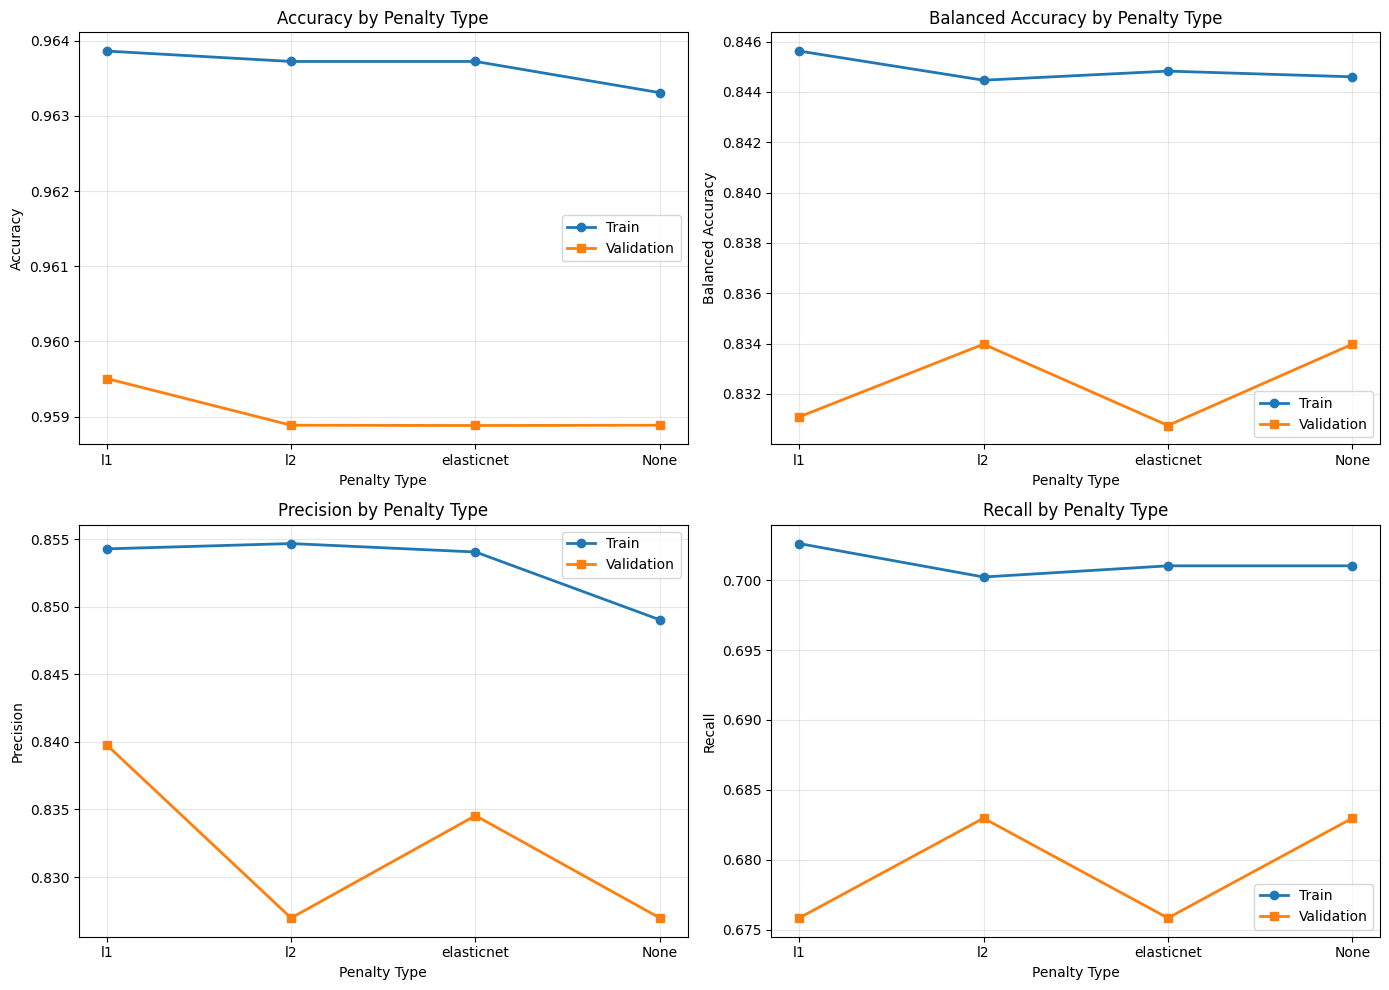

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['acc', 'balanced_acc', 'prec', 'rec']
titles = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall']

for ax, metric, title in zip(axes.flat, metrics, titles):
    ax.plot(df_penalty['penalty'], df_penalty[f'train_{metric}'], marker='o', label='Train', linewidth=2)
    ax.plot(df_penalty['penalty'], df_penalty[f'val_{metric}'], marker='s', label='Validation', linewidth=2)
    ax.set_xlabel('Penalty Type')
    ax.set_ylabel(title)
    ax.set_title(f'{title} by Penalty Type')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🔜 Step 2 - Variare il parametro C

Test: diversi valori di C (es. 0.001, 0.01, 0.1, 1, 10, 100, 1000)

Plot delle performance (curva di regolarizzazione)

In [62]:
# Step 2: Variare C (forza della regolarizzazione)
# C piccolo = regolarizzazione forte = modello semplice
# C grande = regolarizzazione debole = modello complesso

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

results_C = []

for C in C_values:
    print(f"\n{'='*50}")
    print(f"Testing C: {C}")
    print('='*50)
    
    lr = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(
            C=C,
            penalty='l2',      # Usiamo L2 (funziona con tutti i solver)
            solver='lbfgs',    # Solver standard
            max_iter=10000,
            random_state=42
        ))
    ])
    
    lr_cv = cross_validate(lr, X_train, y_train, cv=kf,
                           scoring=scoring, return_train_score=True) 
    
    print_metrics(lr_cv)
    
    # Salva risultati
    results_C.append({
        'C': C,
        'train_acc': lr_cv['train_Acc'].mean(),
        'val_acc': lr_cv['test_Acc'].mean(),
        'train_balanced_acc': lr_cv['train_Balanced_Acc'].mean(),
        'val_balanced_acc': lr_cv['test_Balanced_Acc'].mean(),
        'train_prec': lr_cv['train_Prec'].mean(),
        'val_prec': lr_cv['test_Prec'].mean(),
        'train_rec': lr_cv['train_Rec'].mean(),
        'val_rec': lr_cv['test_Rec'].mean()
    })

df_C = pd.DataFrame(results_C)
print("\n" + "="*50)
print("Summary:")
print("="*50)
print(df_C)


Testing C: 0.001
Train Acc: 0.91
Train Balanced_Acc: 0.5
Train Prec: 0.0
Train Rec: 0.0

Validation Acc: 0.91
Validation Balanced_Acc: 0.5
Validation Prec: 0.0
Validation Rec: 0.0

Testing C: 0.01


c:\Users\Alumne_mati1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alumne_mati1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alumne_mati1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Train Acc: 0.94
Train Balanced_Acc: 0.68
Train Prec: 0.93
Train Rec: 0.36

Validation Acc: 0.94
Validation Balanced_Acc: 0.66
Validation Prec: 0.93
Validation Rec: 0.32

Testing C: 0.1
Train Acc: 0.97
Train Balanced_Acc: 0.84
Train Prec: 0.89
Train Rec: 0.69

Validation Acc: 0.96
Validation Balanced_Acc: 0.82
Validation Prec: 0.86
Validation Rec: 0.65

Testing C: 1
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68

Testing C: 10
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68

Testing C: 100
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68

Testing C: 1000
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Valida

| C | Risultato | Spiegazione |
|---|-----------|-------------|
| 0.001 | ❌ INUTILE | Predice sempre "No". Recall=0, non trova nessun "Yes" |
| 0.01 | ⚠️ TROPPO SEMPLICE | Trova solo 32% dei "Yes", molto conservativo |
| 0.1 | ✅ OTTIMO | Balanced Acc 82%, Recall 65%, Precision 86% |
| 1 | ✅ OTTIMO | Balanced Acc 83%, Recall 68%, Precision 83% |
| 10+ | ✅ PLATEAU | Risultati identici a C=1, non migliora più |

**Conclusione: C = 1 è il valore ottimale**

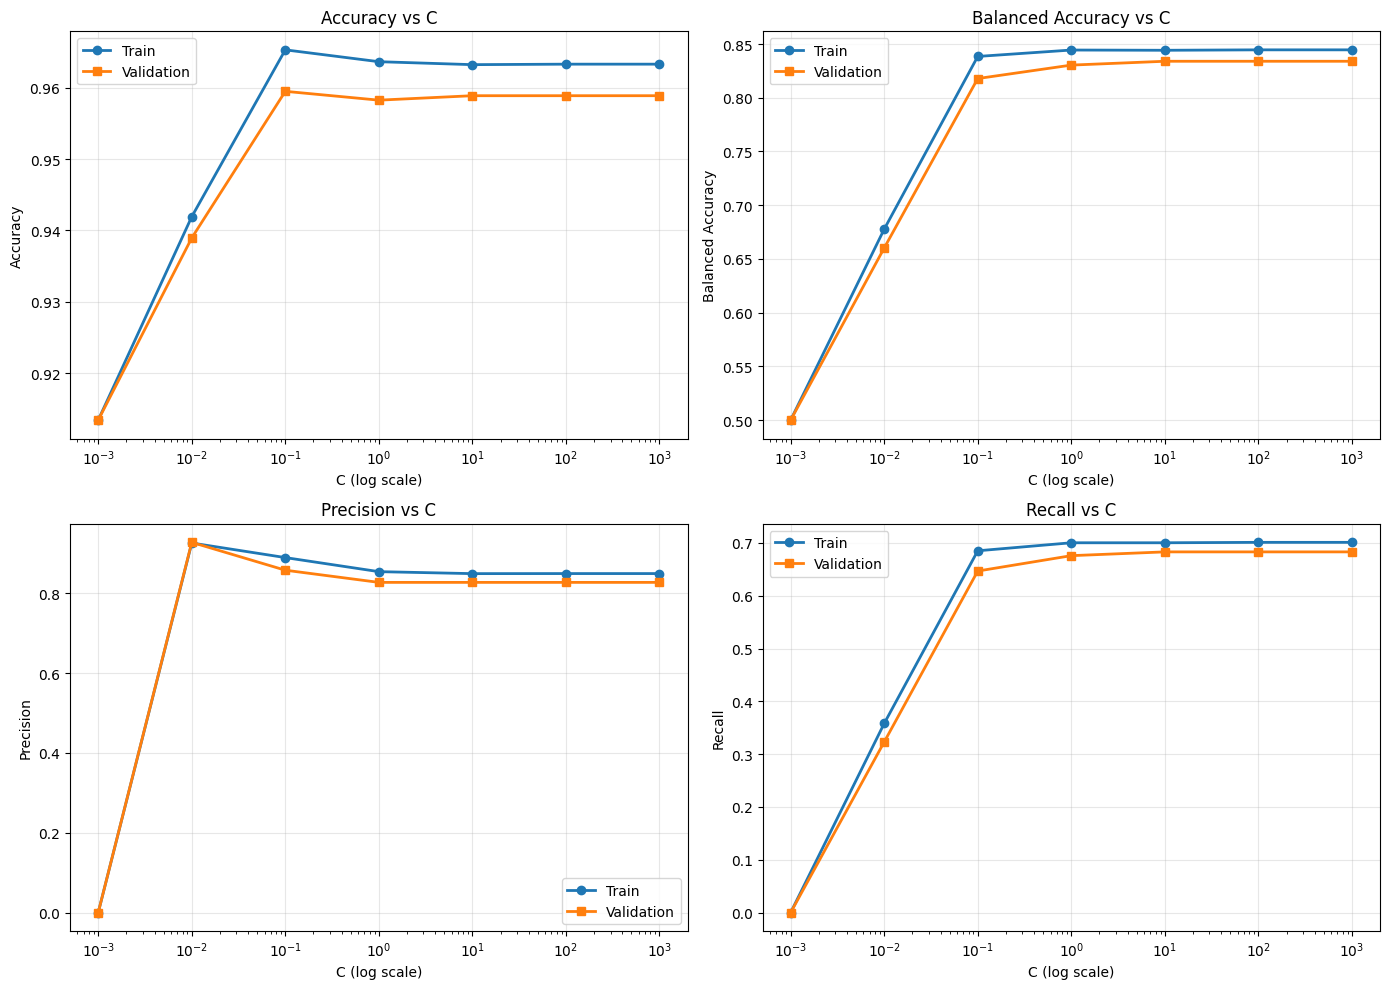

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['acc', 'balanced_acc', 'prec', 'rec']
titles = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall']

for ax, metric, title in zip(axes.flat, metrics, titles):
    ax.plot(df_C['C'], df_C[f'train_{metric}'], marker='o', label='Train', linewidth=2)
    ax.plot(df_C['C'], df_C[f'val_{metric}'], marker='s', label='Validation', linewidth=2)
    ax.set_xscale('log')
    ax.set_xlabel('C (log scale)')
    ax.set_ylabel(title)
    ax.set_title(f'{title} vs C')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🔜 Step 3: Variare il Solver

Cos'è il solver?
Algoritmo di ottimizzazione usato per allenare il modello.

Solver disponibili:
- `'lbfgs'` - default, buono per dataset piccoli-medi
- `'liblinear'` - buono per dataset piccoli
- `'newton-cg'` - simile a lbfgs
- `'newton-cholesky'` - versione ottimizzata di newton-cg
- `'sag'` - Stochastic Average Gradient, veloce su dataset grandi
- `'saga'` - versione migliorata di sag, supporta tutti i penalty

Testiamo tutti con **penalty='l2'** e **C=1** (valori ottimali trovati prima).

In [64]:
# Step 3: Variare il solver
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

results_solver = []

for solver in solvers:
    print(f"\n{'='*50}")
    print(f"Testing solver: {solver}")
    print('='*50)
    
    lr = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(
            C=1,                # Valore ottimale trovato nello step 2
            penalty='l2',       # Compatibile con tutti i solver
            solver=solver,
            max_iter=10000,
            random_state=42
        ))
    ])
    
    lr_cv = cross_validate(lr, X_train, y_train, cv=kf,
                           scoring=scoring, return_train_score=True)
    
    print_metrics(lr_cv)
    
    # Salva risultati
    results_solver.append({
        'solver': solver,
        'train_acc': lr_cv['train_Acc'].mean(),
        'val_acc': lr_cv['test_Acc'].mean(),
        'train_balanced_acc': lr_cv['train_Balanced_Acc'].mean(),
        'val_balanced_acc': lr_cv['test_Balanced_Acc'].mean(),
        'train_prec': lr_cv['train_Prec'].mean(),
        'val_prec': lr_cv['test_Prec'].mean(),
        'train_rec': lr_cv['train_Rec'].mean(),
        'val_rec': lr_cv['test_Rec'].mean()
    })

df_solver = pd.DataFrame(results_solver)
print("\n" + "="*50)
print("Summary:")
print("="*50)
print(df_solver)


Testing solver: lbfgs
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68

Testing solver: liblinear
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.84
Validation Rec: 0.68

Testing solver: newton-cg
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68

Testing solver: newton-cholesky
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68

Testing solver: sag
Train Acc: 0.96
Train Balanced_Acc: 0.84
Train Prec: 0.85
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.83
Validation Rec: 0.68

Testing solver: saga
Train A

Risultati Step 3 - Variazione Solver

Conclusione principale:
**TUTTI i solver danno risultati quasi IDENTICI** 

| Solver | Val Balanced Acc | Val Recall | Differenza |
|--------|------------------|------------|------------|
| lbfgs | 83.04% | 67.58% | - |
| liblinear | 83.47% | 68.30% | +0.4% migliore |
| newton-cg | 83.40% | 68.30% | +0.4% |
| newton-cholesky | 83.40% | 68.30% | +0.4% |
| sag | 83.40% | 68.30% | +0.4% |
| saga | 83.40% | 68.30% | +0.4% |

Interpretazione:
- Differenze minime (< 1%) tra tutti i solver
- **liblinear** leggermente migliore ma insignificante
- Per questo dataset, il solver NON influenza molto le performance
- Più importante è scegliere C giusto (step 2)
 Quale usare?
- **lbfgs** → Default sklearn, va bene
- **liblinear** → Leggermente migliore qui, buono per dataset piccoli
- **saga** → Necessario solo se usi elasticnet

**Raccomandazione: usa `lbfgs` (default) o `liblinear`**

🔜  Step 4: Hyperparameter Search

Grid Search vs Randomized Search

**Grid Search**:
- Testa **TUTTE** le combinazioni possibili
- **Pro:** Garantisce di trovare l'ottimo nel range definito
- **Contro:** MOLTO lento (es. 5 valori × 3 penalty × 4 solver = 60 combinazioni)

**Randomized Search**:
- Testa un **numero limitato** di combinazioni casuali
- **Pro:** Molto più veloce, spesso trova soluzioni quasi ottimali
- **Contro:** Non garantisce l'ottimo assoluto

La tua scelta: Randomized Search ✅

**È la scelta giusta perché:**
1. Dataset di dimensioni medie → Grid Search sarebbe lento
2. Abbiamo già identificato range ottimali negli step precedenti
3. Le differenze tra solver sono minime → non serve testare tutto
4. Randomized Search con 50-100 iterazioni è già molto robusto

**Parametri da ottimizzare**:

| Parametro | Range da testare | Note |
|-----------|------------------|------|
| `C` | [0.01, 0.1, 1, 10, 100] | Abbiamo visto che 0.1-10 sono ottimali |
| `penalty` | ['l1', 'l2', 'elasticnet'] | Escludiamo None (non migliora) |
| `solver` | Dipende dal penalty | Randomized Search gestisce le incompatibilità |
| `l1_ratio` | [0.1, 0.3, 0.5, 0.7, 0.9] | Solo se penalty='elasticnet' |

**Scoring**:
Quale metrica ottimizzare? 
- `'balanced_accuracy'` → Buona per dataset sbilanciati (il tuo caso)
- `'f1'` → Bilanciamento precision/recall
- `'roc_auc'` → Considera le probabilità

**Consiglio: usa `balanced_accuracy`** perché il dataset è sbilanciato (91% No, 9% Yes)

### Numero di iterazioni:
- 50 iterazioni → veloce, buoni risultati
- 100 iterazioni → più robusto
- 200+ iterazioni → overkill per questo caso

**Consiglio: inizia con 50, se non sei soddisfatto aumenta a 100**


In [65]:
# Step 4: Randomized Search per ottimizzare tutti i parametri insieme

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Definisci i parametri da testare
param_distributions = {
    'lr__C': [0.01, 0.1, 1, 10, 100],  # Range di regolarizzazione
    'lr__penalty': ['l1', 'l2'],        # Penalty (escludiamo elasticnet per semplicità)
    'lr__solver': ['lbfgs', 'liblinear', 'saga'],  # Solver principali
    'lr__max_iter': [10000]  # Fisso per evitare problemi di convergenza
}

# Pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lr_pipeline,
    param_distributions=param_distributions,
    n_iter=100,                    # Numero di combinazioni da testare
    cv=kf,                        # Cross-validation
    scoring='balanced_accuracy',  # Metrica da ottimizzare (dataset sbilanciato)
    n_jobs=-1,                    # Usa tutti i core disponibili
    random_state=42,
    verbose=2                     # Mostra progresso
)

print("Inizio Randomized Search...")
print("="*50)

# Fit
random_search.fit(X_train, y_train)

print("\n" + "="*50)
print("MIGLIORI PARAMETRI TROVATI:")
print("="*50)
print(random_search.best_params_)

print("\n" + "="*50)
print("MIGLIOR SCORE (Balanced Accuracy):")
print("="*50)
print(f"{random_search.best_score_:.4f}")

# Valuta il miglior modello su train e validation con tutte le metriche
print("\n" + "="*50)
print("PERFORMANCE DEL MIGLIOR MODELLO:")
print("="*50)

best_model = random_search.best_estimator_

# Cross-validation con tutte le metriche
best_cv = cross_validate(best_model, X_train, y_train, cv=kf,
                         scoring=scoring, return_train_score=True)

print_metrics(best_cv)

# Salva il miglior modello per dopo
best_lr_model = best_model

Inizio Randomized Search...
Fitting 10 folds for each of 30 candidates, totalling 300 fits


c:\Users\Alumne_mati1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Alumne_mati1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alumne_mati1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    esti


MIGLIORI PARAMETRI TROVATI:
{'lr__solver': 'liblinear', 'lr__penalty': 'l1', 'lr__max_iter': 10000, 'lr__C': 1}

MIGLIOR SCORE (Balanced Accuracy):
0.8347

PERFORMANCE DEL MIGLIOR MODELLO:
Train Acc: 0.96
Train Balanced_Acc: 0.85
Train Prec: 0.86
Train Rec: 0.7

Validation Acc: 0.96
Validation Balanced_Acc: 0.83
Validation Prec: 0.84
Validation Rec: 0.68


È normale (50 fits failed with the following error:)? **SÌ ✅**

RandomizedSearchCV prova combinazioni casuali. Alcune sono incompatibili (es. `l1` + `lbfgs`), sklearn le salta e avvisa.

Non è un problema. Ha trovato il miglior modello: `C=1, penalty='l1', solver='liblinear'` con score 0.8347.

Per evitare warning: usa solo `penalty='l2'` (compatibile con tutti i solver).

**Recall attuale:** 68% → perdi il 32% dei casi positivi

| Opzione | Descrizione | Pro | Contro |
|--------|-------------|-----|--------|
| **1. Abbassare la soglia di classificazione (0.5 → 0.3–0.4)** | Rende il modello più sensibile | Trova più "Yes" | Aumentano i falsi positivi, precision scende |
| **2. Usare `class_weight='balanced'`** | Aumenta il peso degli errori sulla classe minoritaria | Modello più attento ai "Yes" | Potenziale aumento di rumore |
| **3. Cambiare soglia con `predict_proba()`** | Usa le probabilità e ottimizza la soglia | Massimizza il recall | Può diminuire la precision |
| **4. Usare altri modelli (RF, XGBoost)** | Modelli più complessi possono catturare pattern migliori | Recall potenzialmente più alto | Richiede tuning e più risorse |



In [24]:
# Randomized Search per massimizzare RECALL

from sklearn.model_selection import RandomizedSearchCV

# Parametri da testare
param_distributions = {
    'lr__C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100],  # Range più ampio
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear', 'saga'],  # Solo solver compatibili con l1 e l2
    'lr__class_weight': ['balanced', {1: 2}, {1: 3}, {1: 5}],  # Pesi per classe minoritaria
    'lr__max_iter': [10000]
}

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

# Randomized Search ottimizzando RECALL
random_search_recall = RandomizedSearchCV(
    estimator=lr_pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    cv=kf,
    scoring='recall',  # ← OTTIMIZZA RECALL invece di balanced_accuracy
    n_jobs=-1,
    random_state=42,
    verbose=2
)

print("Randomized Search per massimizzare RECALL...")
print("="*50)

random_search_recall.fit(X_train, y_train)

print("\n" + "="*50)
print("MIGLIORI PARAMETRI per RECALL:")
print("="*50)
print(random_search_recall.best_params_)

print(f"\nMIGLIOR RECALL: {random_search_recall.best_score_:.4f}")

# Performance complete
best_cv_recall = cross_validate(random_search_recall.best_estimator_, 
                                 X_train, y_train, 
                                 cv=kf, scoring=scoring, return_train_score=True)   # qua e´giusto? 

print("\n" + "="*50)
print("PERFORMANCE COMPLETE:")
print("="*50)
print_metrics(best_cv_recall)

# Salva modello
best_recall_model = random_search_recall.best_estimator_

Randomized Search per massimizzare RECALL...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits

MIGLIORI PARAMETRI per RECALL:
{'lr__solver': 'saga', 'lr__penalty': 'l2', 'lr__max_iter': 10000, 'lr__class_weight': 'balanced', 'lr__C': 0.1}

MIGLIOR RECALL: 0.8709

PERFORMANCE COMPLETE:
Train Acc: 0.93
Train Balanced_Acc: 0.92
Train Prec: 0.57
Train Rec: 0.91

Validation Acc: 0.93
Validation Balanced_Acc: 0.9
Validation Prec: 0.57
Validation Rec: 0.87



**Analisi risultati - Recall ottimizzato**

| Metica | Prima | Dopo | Interpretazione |
|--------|--------|--------|----------------|
| **Recall** | 68% | **87%** | Trovi molti più "Yes" reali |
| **Precision** | 84% | **57%** | Molti più falsi positivi |
| **Accuracy** | 96% | **93%** | Leggero calo generale |


**Impatto sul business**

| Scenario | Qualità dei "Yes" predetti | % veri "Yes" persi | Significato |
|----------|----------------------------|----------------------|-------------|
| **Prima (C=1, no class_weight)** | 84 veri / 100 predetti | 32% persi | Meno chiamate inutili, ma perdi molti clienti veri |
| **Dopo (C=0.1 + balanced)** | 57 veri / 100 predetti | 13% persi | Trovi quasi tutti i clienti veri, ma con più spreco |


**Trade-off**

| Vantaggi | Svantaggi |
|----------|-----------|
| + Molto più recall (87%) → massimizzi le sottoscrizioni | - Precision bassa (57%) → molte chiamate inutili |
| + Perdi solo 13% dei clienti veri | - Aumento dei costi operativi |


**Conclusione**

| Decisione | Motivo |
|-----------|--------|
| **Modello corretto per te** | Se “richiamare costa meno che perdere una sottoscrizione”, questo setup massimizza i guadagni |
| Configurazione | `C=0.1` + `class_weight='balanced'` = modello più aggressivo nel predire "Yes" |



In [25]:
# Step 5: Confusion Matrix con cross_val_predict

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Usa il miglior modello trovato (quello con recall alto)
final_model = best_recall_model

# Ottieni predizioni per TUTTI i dati di validation tramite cross-validation
# Ogni sample viene predetto quando è nel validation fold
y_pred_cv = cross_val_predict(final_model, X_train, y_train, cv=kf) # qua e´giusto?

print("Predizioni ottenute con cross_val_predict")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape y_pred_cv: {y_pred_cv.shape}")

# Calcola confusion matrix
cm = confusion_matrix(y_train, y_pred_cv)

print("\n" + "="*50)
print("CONFUSION MATRIX:")
print("="*50)
print(cm)
print(f"\nTrue Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")

# Calcola metriche dalla confusion matrix
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
balanced_acc = ((tp / (tp + fn)) + (tn / (tn + fp))) / 2

print("\n" + "="*50)
print("METRICHE DALLA CONFUSION MATRIX:")
print("="*50)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balanced_acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Predizioni ottenute con cross_val_predict
Shape y_train: (1605,)
Shape y_pred_cv: (1605,)

CONFUSION MATRIX:
[[1372   94]
 [  18  121]]

True Negatives (TN): 1372
False Positives (FP): 94
False Negatives (FN): 18
True Positives (TP): 121

METRICHE DALLA CONFUSION MATRIX:
Accuracy: 0.93
Balanced Accuracy: 0.90
Precision: 0.56
Recall: 0.87


🔜   Step 5 - 

**Obiettivo**
Creare la **confusion matrix** usando predizioni generate con **cross_val_predict()**.

**Perché usare cross_val_predict?**

| Motivo | Spiegazione |
|--------|-------------|
| Predizioni realistiche | Ogni sample è predetto mentre è in validation |
| 10-fold CV | Dati divisi in 10 parti |
| Processo | Allena su 9 folds → predice sul 1 fold → ripete 10 volte |
| Risultato | Predizioni per **tutti** i sample del training set |

**Opzioni di modello**

| Opzione | Parametri | Performance | Comportamento |
|--------|-----------|-------------|---------------|
| **1. Modello bilanciato** | `C=1`, `l1`, `liblinear` | Balanced Acc 83% • Recall 68% • Precision 84% | Conservativo → meno falsi positivi |
| **2. Modello recall-alto** | `C=0.1`, `l2`, `saga`, `class_weight=balanced` | Balanced Acc 90% • Recall 87% • Precision 57% | Aggressivo → trova più “Yes” |


**Scelta del modello (dipende dal business)**

| Scenario | Modello consigliato | Perché |
|---------|----------------------|--------|
| **Chiamare costa poco** | **Opzione 2** | Massimizza il recall |
| **Chiamare costa molto** | **Opzione 1** | Massimizza la precision |




In [26]:
# Se chiamare costa poco → **Opzione 2** (recall alto)
# Step 5: Confusion Matrix con cross_val_predict 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Usa il miglior modello trovato (quello con recall alto)
final_model = best_recall_model

# Ottieni predizioni per TUTTI i dati di validation tramite cross-validation
# Ogni sample viene predetto quando è nel validation fold
y_pred_cv = cross_val_predict(final_model, X_train, y_train, cv=kf)

print("Predizioni ottenute con cross_val_predict")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape y_pred_cv: {y_pred_cv.shape}")

# Calcola confusion matrix
cm = confusion_matrix(y_train, y_pred_cv)

print("\n" + "="*50)
print("CONFUSION MATRIX:")
print("="*50)
print(cm)
print(f"\nTrue Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")

# Calcola metriche dalla confusion matrix
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
balanced_acc = ((tp / (tp + fn)) + (tn / (tn + fp))) / 2

print("\n" + "="*50)
print("METRICHE DALLA CONFUSION MATRIX:")
print("="*50)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balanced_acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Predizioni ottenute con cross_val_predict
Shape y_train: (1605,)
Shape y_pred_cv: (1605,)

CONFUSION MATRIX:
[[1372   94]
 [  18  121]]

True Negatives (TN): 1372
False Positives (FP): 94
False Negatives (FN): 18
True Positives (TP): 121

METRICHE DALLA CONFUSION MATRIX:
Accuracy: 0.93
Balanced Accuracy: 0.90
Precision: 0.56
Recall: 0.87


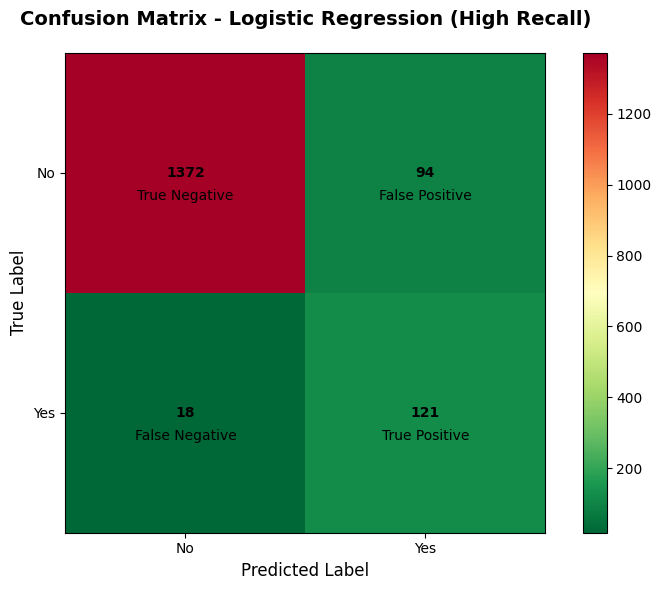


INTERPRETAZIONE:
TN (1372): Clienti che NON sottoscrivono, correttamente identificati
FP (94): Clienti che NON sottoscrivono, ma li chiamiamo (costo operativo)
FN (18): Clienti che sottoscriverebbero, ma NON li chiamiamo (OPPORTUNITÀ PERSA)
TP (121): Clienti che sottoscrivono, correttamente identificati (GUADAGNO)


In [27]:
# Plot Confusion Matrix 


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crea il display della confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['No', 'Yes'])

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='RdYlGn_r', ax=ax, colorbar=True, values_format='d')
for text in disp.text_.ravel():
    text.set_color('black')
    text.set_weight('bold')

# Aggiungi etichette dettagliate in ogni cella - TUTTO NERO
ax.text(0, 0, '\nTrue Negative', ha='center', va='top')
ax.text(1, 0, '\nFalse Positive', ha='center', va='top')
ax.text(0, 1, '\nFalse Negative', ha='center', va='top')
ax.text(1, 1, '\nTrue Positive', ha='center', va='top')

# Titolo e labels
ax.set_title('Confusion Matrix - Logistic Regression (High Recall)', fontsize=14, weight='bold', pad=20)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()

# Interpretazione
print("\n" + "="*50)
print("INTERPRETAZIONE:")
print("="*50)
print(f"TN ({cm[0,0]}): Clienti che NON sottoscrivono, correttamente identificati")
print(f"FP ({cm[0,1]}): Clienti che NON sottoscrivono, ma li chiamiamo (costo operativo)")
print(f"FN ({cm[1,0]}): Clienti che sottoscriverebbero, ma NON li chiamiamo (OPPORTUNITÀ PERSA)")
print(f"TP ({cm[1,1]}): Clienti che sottoscrivono, correttamente identificati (GUADAGNO)")

## K-Neighbours Classifier (PROFESSOR)

In [28]:
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5, p=1))
])
knn_cv = cross_validate(knn, X_train, y_train, cv=kf,
                        scoring=scoring, return_train_score=True)

print_metrics(knn_cv)

Train Acc: 0.94
Train Balanced_Acc: 0.69
Train Prec: 0.91
Train Rec: 0.39

Validation Acc: 0.94
Validation Balanced_Acc: 0.66
Validation Prec: 0.85
Validation Rec: 0.32


####📚 Quando Scalare o non: Regola Generale

| **Modello**             | **Scalare?** | **Perché**                                               |
| ----------------------- | ------------ | -------------------------------------------------------- |
| `kNN`                   | ✅ **SÌ**     | Usa distanze euclidee → **molto sensibile alla scala**     |
| `SVM`                   | ✅ **SÌ**     | Usa distanze e kernel → **molto sensibile alla scala**     |
| `Regressione Logistica` | ✅ **SÌ**     | Convergenza **più veloce** e **più stabile**               |
| `Reti Neurali`          | ✅ **SÌ**     | Favorisce **convergenza e stabilità** dell'apprendimento   |
| `PCA`, `K-Means`        | ✅ **SÌ**     | Basati su **distanze** → la scala è fondamentale           |
| `Decision Tree`       | ❌ **NO**     | Fa split sui valori → **non calcola distanze**               |
| `Random Forest`       | ❌ **NO**     | Insieme di Decision Tree → **non è influenzato dalla scala** |
| `Gradient Boosting`   | ❌ **NO**     | Anche tree-based → **la scala non ha effetto**               |
| `XGBoost`, `LightGBM` | ❌ **NO**     | Sono modelli basati su alberi → **non richiedono scaling**   |


Nel mio caso: 

| **Step** | **Modello**                 | **Devi Scalare?**                     |
| -------- | --------------------------- | ------------------------------------- |
| 1        | `kNN` (k-Nearest Neighbors) | ✅ **SÌ**, usa una pipeline con scaler |
| 2        | `DT` (Decision Tree)        | ❌ **NO**                              |
| 3        | `RF` (Random Forest)        | ❌ **NO**                              |
| 4        | `GB` (Gradient Boosting)    | ❌ **NO**                              |


### kNN - Ottimizzazione con RandomizedSearchCV

Step 1: Definizione Hyperparameters

| Parametro | Cosa fa | Valori da testare | Perché questi valori |
|-----------|---------|-------------------|---------------------|
| `n_neighbors` | Numero di vicini da considerare | [3, 5, 7, 9, 11, 15, 20, 25, 30] | Troppo piccolo = overfitting, troppo grande = underfitting |
| `weights` | Come pesare i vicini | ['uniform', 'distance'] | uniform = tutti uguali, distance = più vicini contano di più |
| `metric` | Come misurare la distanza | ['euclidean', 'manhattan', 'minkowski'] | Diversi modi di calcolare "quanto sono vicini" |
| `p` | Parametro per Minkowski | [1, 2] | p=1 è Manhattan, p=2 è Euclidean |

**Nota importante per kNN**: Questo algoritmo è sensibile alla scala dei dati, quindi devi usare uno StandardScaler!

In [29]:
# ============================================================
# STEP 1 BIS: DEFINIRE HYPERPARAMETERS CON SCALER
# ============================================================
from sklearn.preprocessing import StandardScaler

# Parametri per kNN CON scaler
param_dist_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25, 30],  # Nota: knn__
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2]
}

# ============================================================
# STEP 2 BIS: RANDOMIZEDSEARCHCV CON PIPELINE
# ============================================================

# Creare una Pipeline con scaler + knn
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # AGGIUNTO!
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

# RandomizedSearchCV con la pipeline
knn_rs = RandomizedSearchCV(
    knn_pipeline,                   # Pipeline invece del modello nudo
    param_distributions=param_dist_knn,
    n_iter=100,
    scoring=scoring,
    refit='Rec',
    cv=kf,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    return_train_score=True
)

# Eseguire la ricerca
print("🔍 Inizio ricerca CON SCALING...")
knn_rs.fit(X_train, y_train)
print("✅ Ricerca completata!")

# ============================================================
# STEP 3: MIGLIORI PARAMETRI
# ============================================================
print("🎯 MIGLIORI HYPERPARAMETERS:")
print("-" * 50)
for param, value in knn_rs.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best CV Score (Balanced_Acc): {knn_rs.best_score_:.4f}")

best_knn = knn_rs.best_estimator_

🔍 Inizio ricerca CON SCALING...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
✅ Ricerca completata!
🎯 MIGLIORI HYPERPARAMETERS:
--------------------------------------------------
  knn__weights: uniform
  knn__p: 1
  knn__n_neighbors: 3
  knn__metric: manhattan

📊 Best CV Score (Balanced_Acc): 0.3516


In [30]:
# ============================================================
# STEP 4: PREDIZIONI CON CROSS-VALIDATION
# ============================================================
val_preds_knn = cross_val_predict(best_knn, X_train, y_train, cv=kf)

print("\n📊 METRICHE DI VALIDAZIONE (CON CROSS-VALIDATION):")
print("-" * 50)
print(f"Accuracy:          {accuracy_score(y_train, val_preds_knn):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_train, val_preds_knn):.4f}")
print(f"Precision:         {precision_score(y_train, val_preds_knn):.4f}")
print(f"Recall:            {recall_score(y_train, val_preds_knn):.4f}")


📊 METRICHE DI VALIDAZIONE (CON CROSS-VALIDATION):
--------------------------------------------------
Accuracy:          0.9358
Balanced Accuracy: 0.6718
Precision:         0.7903
Recall:            0.3525


Risultato pessimo____ 

### Decision tree - Ottimizzazione con RandomizedSearchCV

Definisci gli hyperparameters da testare per DT 2. Fai RandomizedSearchCV solo per DT 3. Trovi i migliori parametri per DT 4. Fai predizioni con il migliore DT 5. Plot confusion matrix per DT 6. Vedi feature importance per DT ✅

📋 Hyperparameters da testare per Decision Tree:
--------------------------------------------------
max_depth: [3, 5, 7, 10, 15, 20, None]
min_samples_split: [2, 5, 10, 20, 50]
min_samples_leaf: [1, 2, 5, 10, 20]
criterion: ['gini', 'entropy']
max_features: ['sqrt', 'log2', None]

🔍 Inizio ricerca per Decision Tree...
Fitting 10 folds for each of 50 candidates, totalling 500 fits
✅ Ricerca completata!

🎯 MIGLIORI HYPERPARAMETERS PER DT:
--------------------------------------------------
  min_samples_split: 10
  min_samples_leaf: 10
  max_features: None
  max_depth: 20
  criterion: gini

📊 Best CV Recall: 0.6835

📊 METRICHE DI VALIDAZIONE (CON CROSS-VALIDATION):
--------------------------------------------------
Accuracy:          0.9589
Balanced Accuracy: 0.8342
Precision:         0.8120
Recall:            0.6835


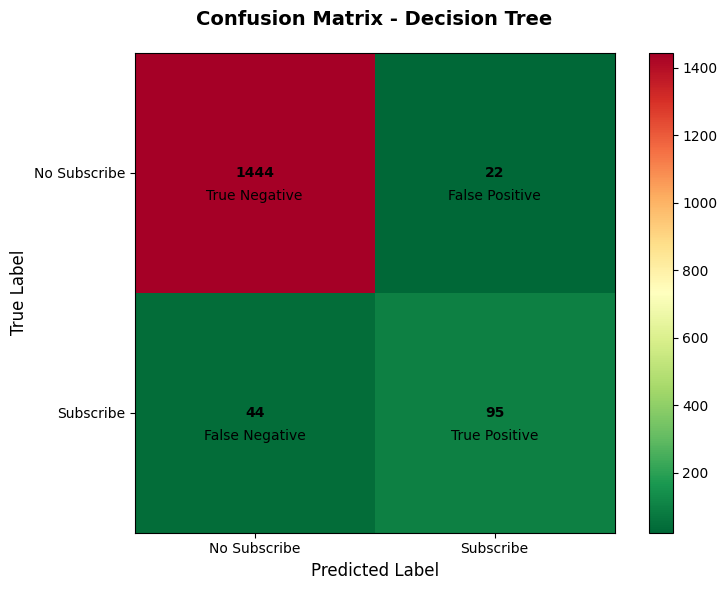


INTERPRETAZIONE:
TN (1444): Clienti che NON sottoscrivono, correttamente identificati
FP (22): Clienti che NON sottoscrivono, ma li chiamiamo (costo operativo)
FN (44): Clienti che sottoscriverebbero, ma NON li chiamiamo (OPPORTUNITÀ PERSA)
TP (95): Clienti che sottoscrivono, correttamente identificati (GUADAGNO)

🔝 TOP 10 FEATURES PIÙ IMPORTANTI:
--------------------------------------------------
                 Feature  Importance
       duration_category    0.540115
        poutcome_success    0.285917
                   pdays    0.055478
economic_profile_ordinal    0.023113
         contact_unknown    0.020886
                     day    0.016984
               age_group    0.015864
          season_ordinal    0.014255
         job_blue-collar    0.009600
          marital_single    0.005369


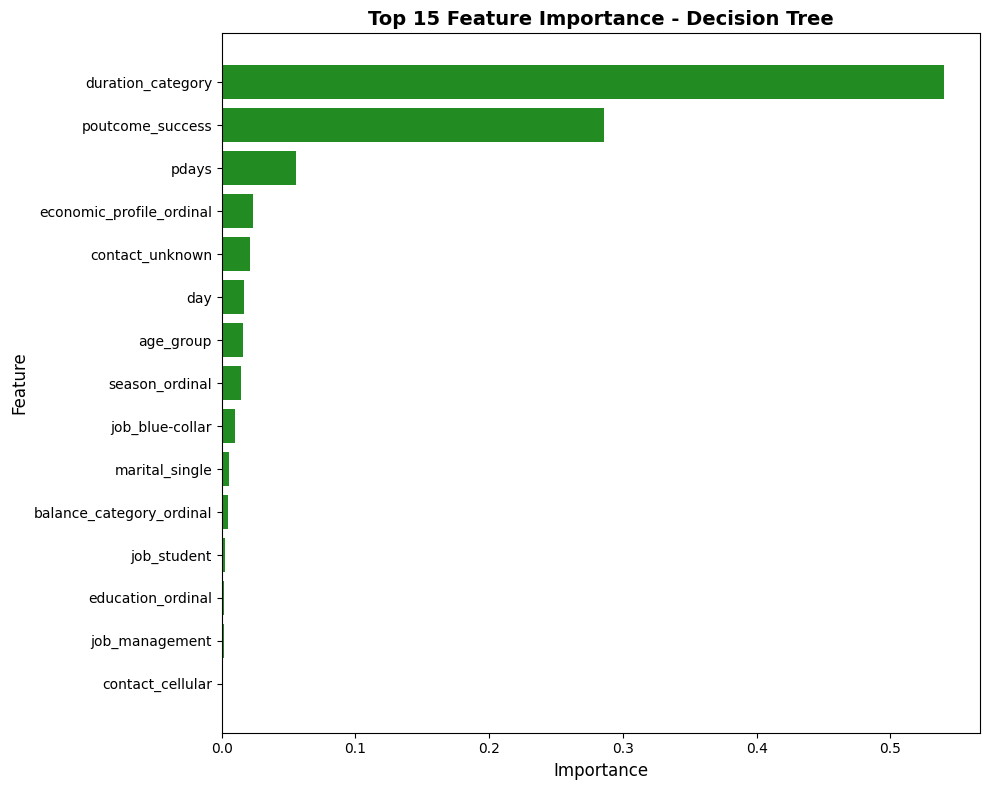

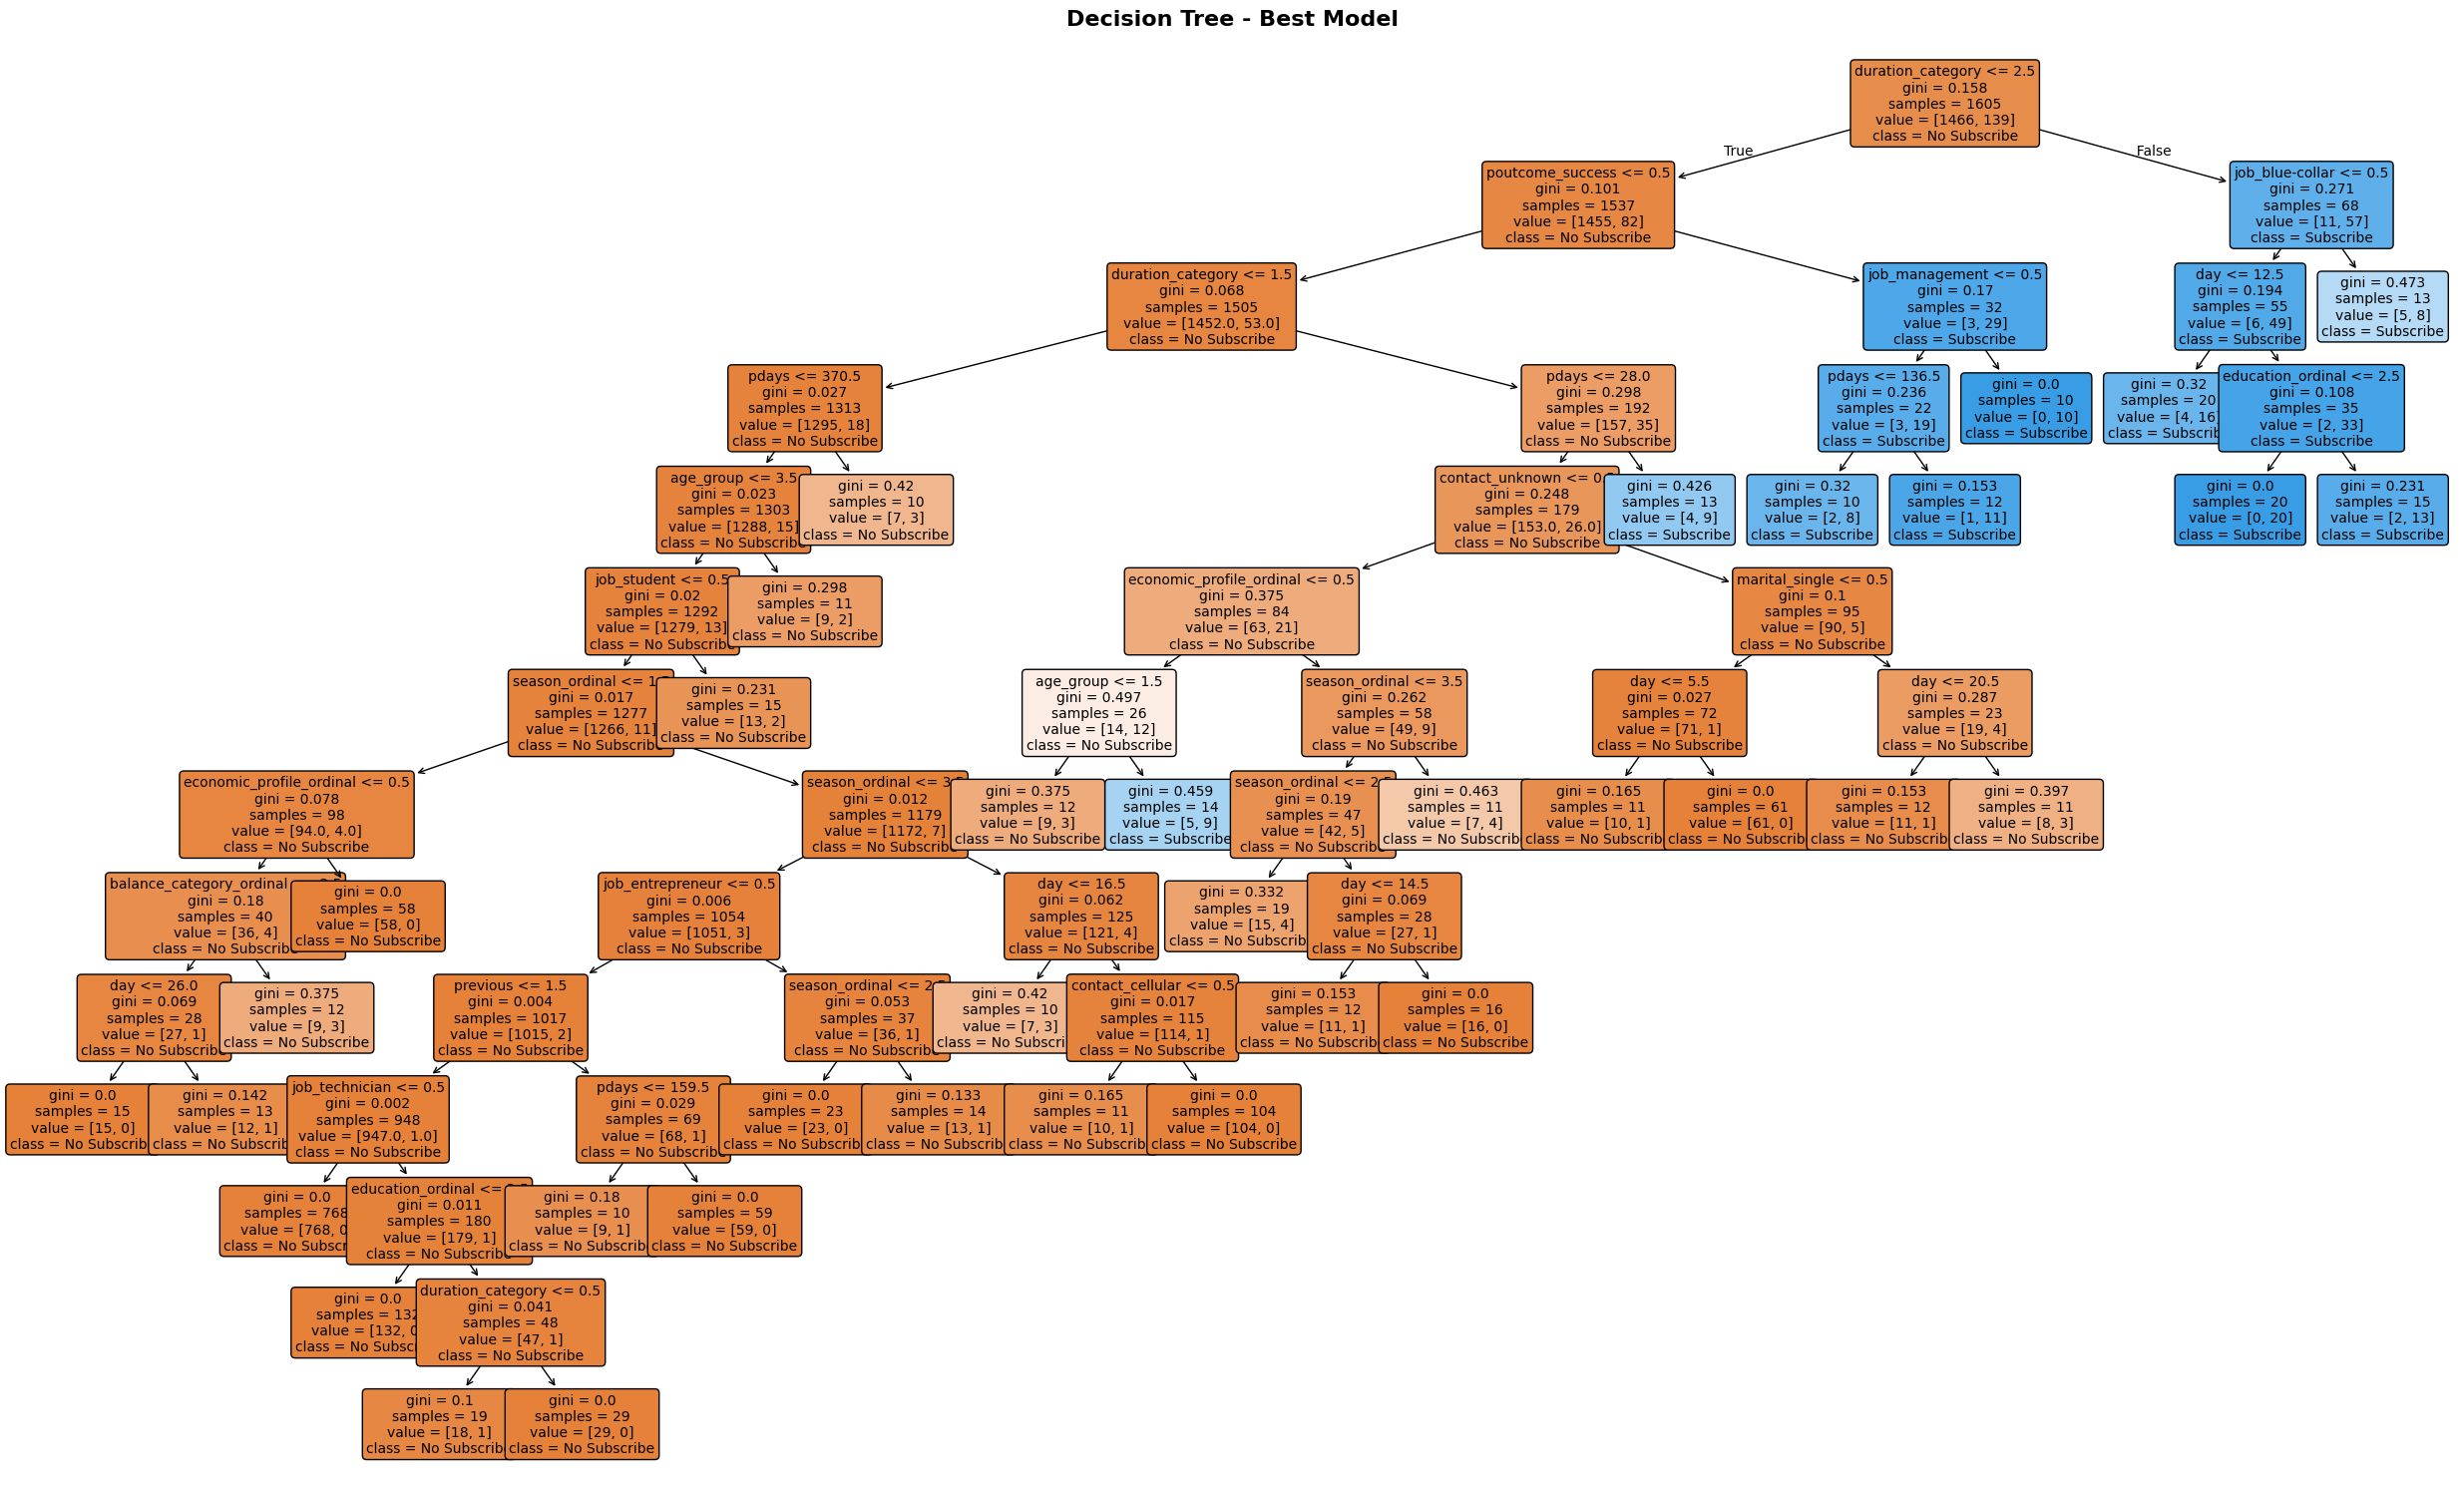


📊 INFORMAZIONI SULL'ALBERO:
--------------------------------------------------
Profondità massima: 13
Numero di foglie: 36
Numero di nodi: 71


In [31]:
# ============================================================
# STEP 1: DEFINIRE HYPERPARAMETERS PER DECISION TREE
# ============================================================

# Parametri da testare per DT
param_dist_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],           # Profondità albero
    'min_samples_split': [2, 5, 10, 20, 50],            # Min campioni per split
    'min_samples_leaf': [1, 2, 5, 10, 20],              # Min campioni per foglia
    'criterion': ['gini', 'entropy'],                    # Metrica per split
    'max_features': ['sqrt', 'log2', None]              # Features da considerare
}

print("📋 Hyperparameters da testare per Decision Tree:")
print("-" * 50)
for param, values in param_dist_dt.items():
    print(f"{param}: {values}")


# ============================================================
# STEP 2: RANDOMIZEDSEARCHCV PER DECISION TREE
# ============================================================

# Creare il modello (Decision Tree NON ha bisogno di scaling!)
dt = DecisionTreeClassifier(random_state=42)

# RandomizedSearchCV
dt_rs = RandomizedSearchCV(
    dt,                                 # Il modello
    param_distributions=param_dist_dt,  # I parametri da testare
    n_iter=50,                          # Numero di combinazioni
    scoring=scoring,                    # Il tuo dizionario di scoring
    refit='Rec',                        # Ottimizza per Recall (come ti serve!)
    cv=kf,                              # Il tuo StratifiedKFold
    n_jobs=-1,                          # Usa tutti i core
    random_state=42,                    # Riproducibilità
    verbose=1,                          # Mostra progresso
    return_train_score=True             # Per vedere train scores
)

# Eseguire la ricerca
print("\n🔍 Inizio ricerca per Decision Tree...")
dt_rs.fit(X_train, y_train)
print("✅ Ricerca completata!")


# ============================================================
# STEP 3: MIGLIORI PARAMETRI TROVATI
# ============================================================

print("\n🎯 MIGLIORI HYPERPARAMETERS PER DT:")
print("-" * 50)
for param, value in dt_rs.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best CV Recall: {dt_rs.best_score_:.4f}")

# Salvare il miglior modello
best_dt = dt_rs.best_estimator_


# ============================================================
# STEP 4: PREDIZIONI CON CROSS-VALIDATION
# ============================================================

# Fare predizioni con cross-validation
val_preds_dt = cross_val_predict(best_dt, X_train, y_train, cv=kf)

print("\n📊 METRICHE DI VALIDAZIONE (CON CROSS-VALIDATION):")
print("-" * 50)
print(f"Accuracy:          {accuracy_score(y_train, val_preds_dt):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_train, val_preds_dt):.4f}")
print(f"Precision:         {precision_score(y_train, val_preds_dt):.4f}")
print(f"Recall:            {recall_score(y_train, val_preds_dt):.4f}")


# ============================================================
# STEP 5: PLOT CONFUSION MATRIX
# ============================================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcolare la confusion matrix
cm_dt = confusion_matrix(y_train, val_preds_dt)

# Creare il plot
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_dt,
    display_labels=['No Subscribe', 'Subscribe']
)
disp.plot(cmap='RdYlGn_r', ax=ax, colorbar=True, values_format='d')
for text in disp.text_.ravel():
    text.set_color('black')
    text.set_weight('bold')

# Aggiungi etichette dettagliate in ogni cella - TUTTO NERO
ax.text(0, 0, '\nTrue Negative', ha='center', va='top')
ax.text(1, 0, '\nFalse Positive', ha='center', va='top')
ax.text(0, 1, '\nFalse Negative', ha='center', va='top')
ax.text(1, 1, '\nTrue Positive', ha='center', va='top')

# Titolo e labels
ax.set_title('Confusion Matrix - Decision Tree', fontsize=14, weight='bold', pad=20)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()

# Interpretazione
print("\n" + "="*50)
print("INTERPRETAZIONE:")
print("="*50)
print(f"TN ({cm_dt[0,0]}): Clienti che NON sottoscrivono, correttamente identificati")
print(f"FP ({cm_dt[0,1]}): Clienti che NON sottoscrivono, ma li chiamiamo (costo operativo)")
print(f"FN ({cm_dt[1,0]}): Clienti che sottoscriverebbero, ma NON li chiamiamo (OPPORTUNITÀ PERSA)")
print(f"TP ({cm_dt[1,1]}): Clienti che sottoscrivono, correttamente identificati (GUADAGNO)")

# ============================================================
# STEP 6: FEATURE IMPORTANCE
# ============================================================

# Ottenere le feature importance
feature_importance = best_dt.feature_importances_
feature_names = X_train.columns

# Creare DataFrame per visualizzare meglio
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Stampare top 10 features più importanti
print("\n🔝 TOP 10 FEATURES PIÙ IMPORTANTI:")
print("-" * 50)
print(importance_df.head(10).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features = importance_df.head(15)  # Top 15
plt.barh(top_features['Feature'], top_features['Importance'], color='forestgreen')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Feature Importance - Decision Tree', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Features più importanti in alto
plt.tight_layout()
plt.show()

# ============================================================
# STEP 7: VISUALIZZARE L'ALBERO MIGLIORE
# ============================================================

from sklearn.tree import plot_tree

# Visualizzare l'albero
plt.figure(figsize=(25, 15))
plot_tree(
    best_dt,                           # Il miglior modello
    filled=True,                       # Colorare i nodi
    feature_names=X_train.columns,     # Nomi delle features
    class_names=['No Subscribe', 'Subscribe'],  # Nomi delle classi
    rounded=True,                      # Bordi arrotondati
    fontsize=10                        # Dimensione del testo
)
plt.title('Decision Tree - Best Model', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Stampare info sull'albero
print("\n📊 INFORMAZIONI SULL'ALBERO:")
print("-" * 50)
print(f"Profondità massima: {best_dt.get_depth()}")
print(f"Numero di foglie: {best_dt.get_n_leaves()}")
print(f"Numero di nodi: {best_dt.tree_.node_count}")

###  Random Forest - Ottimizzazione con RandomizedSearchCV

1. Definisci gli hyperparameters da testare per RF 2. Fai RandomizedSearchCV solo per RF 3. Trovi i migliori parametri per RF
4. Fai predizioni con il migliore RF 5. Plot confusion matrix per RF 6. Vedi feature importance per RF ✅

📋 Hyperparameters da testare per Random Forest:
--------------------------------------------------
n_estimators: [50, 100, 200, 300, 500]
max_depth: [5, 10, 15, 20, 30, None]
min_samples_split: [2, 5, 10, 20]
min_samples_leaf: [1, 2, 4, 8]
max_features: ['sqrt', 'log2', None]
bootstrap: [True, False]
criterion: ['gini', 'entropy']

🔍 Inizio ricerca per Random Forest...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
✅ Ricerca completata!

🎯 MIGLIORI HYPERPARAMETERS PER RF:
--------------------------------------------------
  n_estimators: 500
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: None
  max_depth: 15
  criterion: gini
  bootstrap: False

📊 Best CV Recall: 0.7044

📊 METRICHE DI VALIDAZIONE (CON CROSS-VALIDATION):
--------------------------------------------------
Accuracy:          0.9389
Balanced Accuracy: 0.8331
Precision:         0.6323
Recall:            0.7050


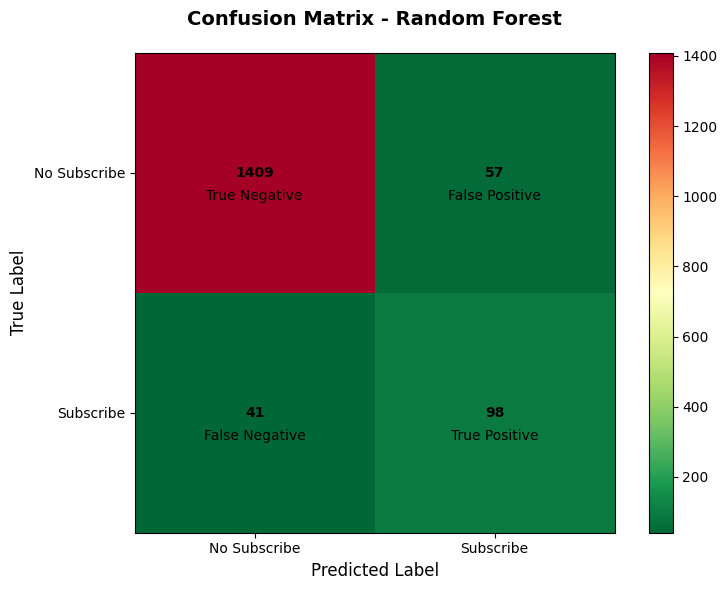


INTERPRETAZIONE:
TN (1409): Clienti che NON sottoscrivono, correttamente identificati
FP (57): Clienti che NON sottoscrivono, ma li chiamiamo (costo operativo)
FN (41): Clienti che sottoscriverebbero, ma NON li chiamiamo (OPPORTUNITÀ PERSA)
TP (98): Clienti che sottoscrivono, correttamente identificati (GUADAGNO)

🔝 TOP 10 FEATURES PIÙ IMPORTANTI:
--------------------------------------------------
                 Feature  Importance
       duration_category    0.358569
 contact_history_ordinal    0.105444
        poutcome_success    0.095616
                     day    0.091749
balance_category_ordinal    0.044005
               age_group    0.036643
                   pdays    0.028017
                previous    0.026790
          season_ordinal    0.026131
economic_profile_ordinal    0.021140


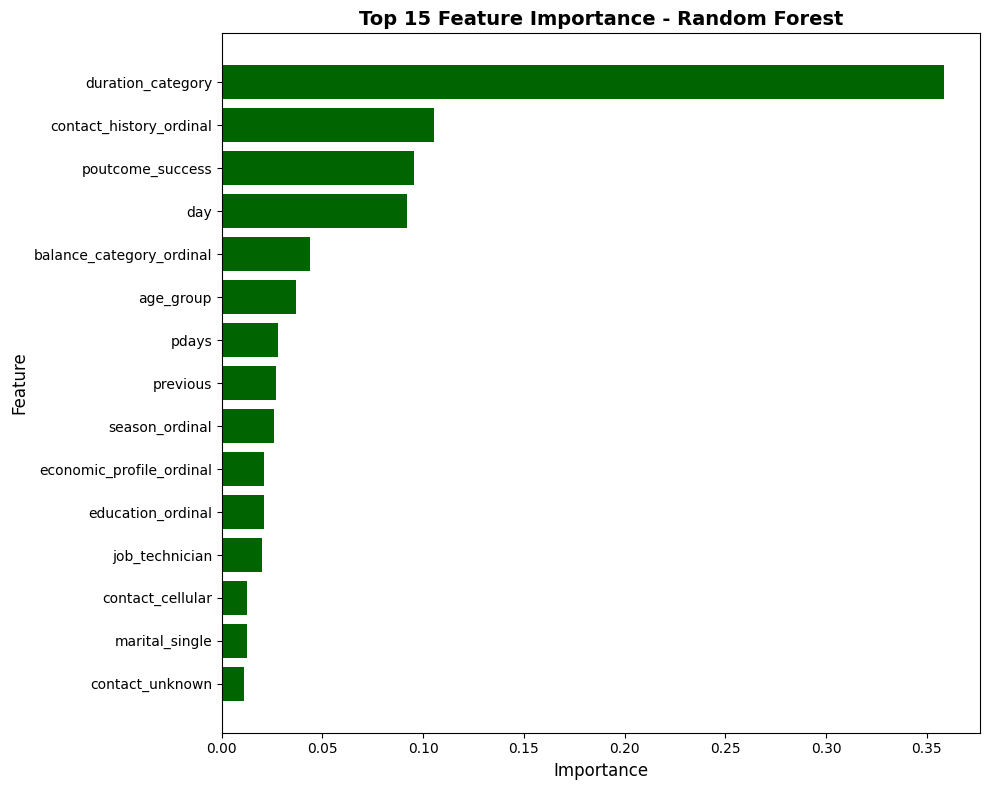

In [32]:
from sklearn.ensemble import RandomForestClassifier



# ============================================================
# STEP 1: DEFINIRE HYPERPARAMETERS PER RANDOM FOREST
# ============================================================

# Parametri da testare per RF
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300, 500],           # Numero di alberi
    'max_depth': [5, 10, 15, 20, 30, None],             # Profondità alberi
    'min_samples_split': [2, 5, 10, 20],                # Min campioni per split
    'min_samples_leaf': [1, 2, 4, 8],                   # Min campioni per foglia
    'max_features': ['sqrt', 'log2', None],             # Features per split
    'bootstrap': [True, False],                         # Campionamento con/senza rimpiazzo
    'criterion': ['gini', 'entropy']                    # Metrica per split
}

print("📋 Hyperparameters da testare per Random Forest:")
print("-" * 50)
for param, values in param_dist_rf.items():
    print(f"{param}: {values}")


# ============================================================
# STEP 2: RANDOMIZEDSEARCHCV PER RANDOM FOREST
# ============================================================

# Creare il modello (RF NON ha bisogno di scaling!)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# RandomizedSearchCV
rf_rs = RandomizedSearchCV(
    rf,                                 # Il modello
    param_distributions=param_dist_rf,  # I parametri da testare
    n_iter=100,                          # Numero di combinazioni
    scoring=scoring,                    # Il tuo dizionario di scoring
    refit='Rec',                        # Ottimizza per Recall
    cv=kf,                              # Il tuo StratifiedKFold
    n_jobs=-1,                          # Usa tutti i core
    random_state=42,                    # Riproducibilità
    verbose=1,                          # Mostra progresso
    return_train_score=True             # Per vedere train scores
)

# Eseguire la ricerca
print("\n🔍 Inizio ricerca per Random Forest...")
rf_rs.fit(X_train, y_train)
print("✅ Ricerca completata!")


# ============================================================
# STEP 3: MIGLIORI PARAMETRI TROVATI
# ============================================================

print("\n🎯 MIGLIORI HYPERPARAMETERS PER RF:")
print("-" * 50)
for param, value in rf_rs.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best CV Recall: {rf_rs.best_score_:.4f}")

# Salvare il miglior modello
best_rf = rf_rs.best_estimator_


# ============================================================
# STEP 4: PREDIZIONI CON CROSS-VALIDATION
# ============================================================

# Fare predizioni con cross-validation
val_preds_rf = cross_val_predict(best_rf, X_train, y_train, cv=kf)

print("\n📊 METRICHE DI VALIDAZIONE (CON CROSS-VALIDATION):")
print("-" * 50)
print(f"Accuracy:          {accuracy_score(y_train, val_preds_rf):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_train, val_preds_rf):.4f}")
print(f"Precision:         {precision_score(y_train, val_preds_rf):.4f}")
print(f"Recall:            {recall_score(y_train, val_preds_rf):.4f}")


# ============================================================
# STEP 5: PLOT CONFUSION MATRIX
# ============================================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcolare la confusion matrix
cm_rf = confusion_matrix(y_train, val_preds_rf)

# Creare il plot con il tuo stile
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf, 
    display_labels=['No Subscribe', 'Subscribe']
)
disp.plot(cmap='RdYlGn_r', ax=ax, colorbar=True, values_format='d')

# Rendere i numeri neri e bold
for text in disp.text_.ravel():
    text.set_color('black')
    text.set_weight('bold')

# Aggiungere etichette dettagliate in ogni cella - TUTTO NERO
ax.text(0, 0, '\nTrue Negative', ha='center', va='top', color='black')
ax.text(1, 0, '\nFalse Positive', ha='center', va='top', color='black')
ax.text(0, 1, '\nFalse Negative', ha='center', va='top', color='black')
ax.text(1, 1, '\nTrue Positive', ha='center', va='top', color='black')

# Titolo e labels
ax.set_title('Confusion Matrix - Random Forest', fontsize=14, weight='bold', pad=20)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()

# Interpretazione
print("\n" + "="*50)
print("INTERPRETAZIONE:")
print("="*50)
print(f"TN ({cm_rf[0,0]}): Clienti che NON sottoscrivono, correttamente identificati")
print(f"FP ({cm_rf[0,1]}): Clienti che NON sottoscrivono, ma li chiamiamo (costo operativo)")
print(f"FN ({cm_rf[1,0]}): Clienti che sottoscriverebbero, ma NON li chiamiamo (OPPORTUNITÀ PERSA)")
print(f"TP ({cm_rf[1,1]}): Clienti che sottoscrivono, correttamente identificati (GUADAGNO)")


# ============================================================
# STEP 6: FEATURE IMPORTANCE
# ============================================================

# Ottenere le feature importance
feature_importance_rf = best_rf.feature_importances_
feature_names = X_train.columns

# Creare DataFrame per visualizzare meglio
importance_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_rf
}).sort_values('Importance', ascending=False)

# Stampare top 10 features più importanti
print("\n🔝 TOP 10 FEATURES PIÙ IMPORTANTI:")
print("-" * 50)
print(importance_df_rf.head(10).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features_rf = importance_df_rf.head(15)  # Top 15
plt.barh(top_features_rf['Feature'], top_features_rf['Importance'], color='darkgreen')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Features più importanti in alto
plt.tight_layout()
plt.show()

###  Gradient Boosting - Ottimizzazione con RandomizedSearchCV

1. Definisci gli hyperparameters da testare per GB 2. Fai RandomizedSearchCV solo per GB 3. Trovi i migliori parametri per GB
4. Fai predizioni con il migliore GB 5. Plot confusion matrix per GB 6. Vedi feature importance per GB✅

📋 Hyperparameters da testare per Gradient Boosting:
--------------------------------------------------
n_estimators: [50, 100, 200, 300, 500]
learning_rate: [0.01, 0.05, 0.1, 0.2, 0.3]
max_depth: [3, 5, 7, 10]
min_samples_split: [2, 5, 10, 20]
min_samples_leaf: [1, 2, 4, 8]
subsample: [0.6, 0.8, 1.0]
max_features: ['sqrt', 'log2', None]

🔍 Inizio ricerca per Gradient Boosting...
Fitting 10 folds for each of 50 candidates, totalling 500 fits
✅ Ricerca completata!

🎯 MIGLIORI HYPERPARAMETERS PER GB:
--------------------------------------------------
  subsample: 0.8
  n_estimators: 300
  min_samples_split: 5
  min_samples_leaf: 1
  max_features: None
  max_depth: 3
  learning_rate: 0.1

📊 Best CV Recall: 0.7044

📊 METRICHE DI VALIDAZIONE (CON CROSS-VALIDATION):
--------------------------------------------------
Accuracy:          0.9539
Balanced Accuracy: 0.8413
Precision:         0.7481
Recall:            0.7050


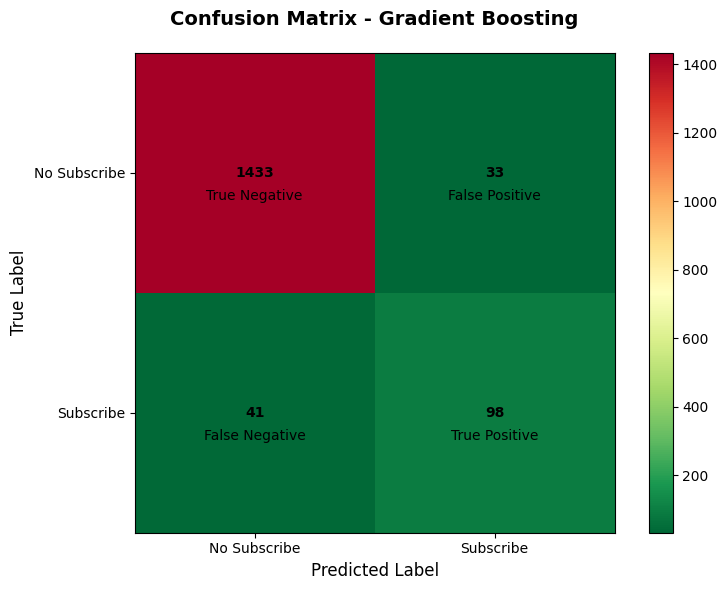


INTERPRETAZIONE:
TN (1433): Clienti che NON sottoscrivono, correttamente identificati
FP (33): Clienti che NON sottoscrivono, ma li chiamiamo (costo operativo)
FN (41): Clienti che sottoscriverebbero, ma NON li chiamiamo (OPPORTUNITÀ PERSA)
TP (98): Clienti che sottoscrivono, correttamente identificati (GUADAGNO)

🔝 TOP 10 FEATURES PIÙ IMPORTANTI:
--------------------------------------------------
                 Feature  Importance
       duration_category    0.387457
        poutcome_success    0.094467
 contact_history_ordinal    0.088679
                     day    0.088249
                   pdays    0.074233
         contact_unknown    0.034506
               age_group    0.032932
economic_profile_ordinal    0.031255
          season_ordinal    0.028331
balance_category_ordinal    0.019506


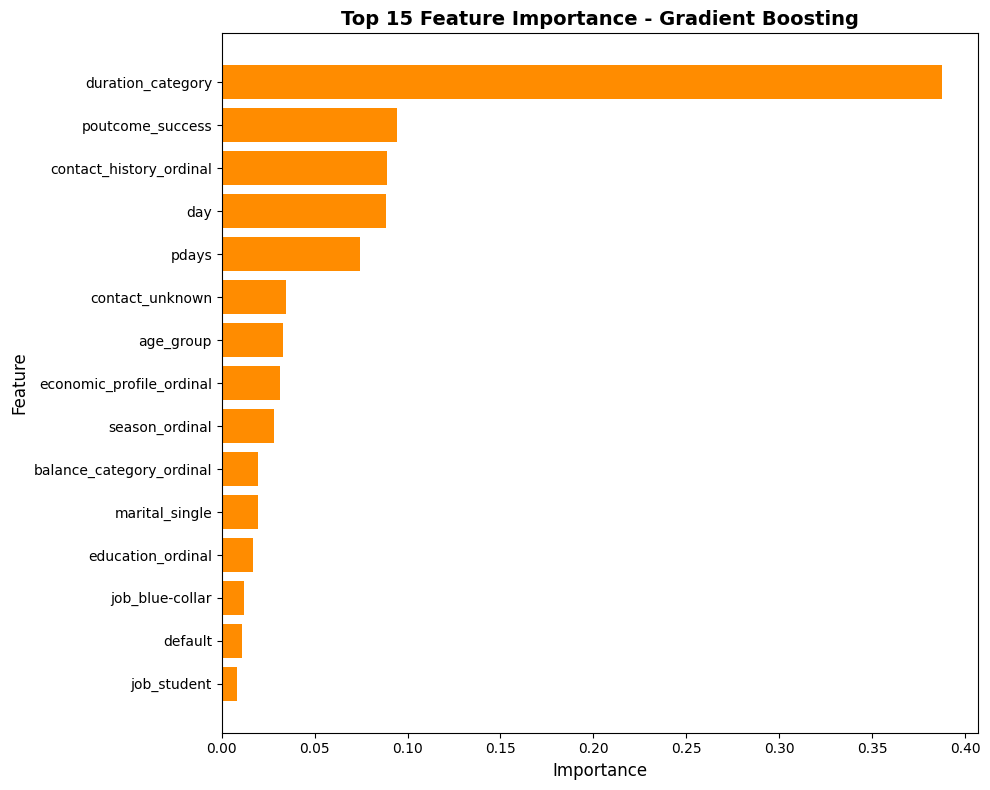

In [33]:
from sklearn.ensemble import GradientBoostingClassifier



# ============================================================
# STEP 1: DEFINIRE HYPERPARAMETERS PER GRADIENT BOOSTING
# ============================================================

# Parametri da testare per GB
param_dist_gb = {
    'n_estimators': [50, 100, 200, 300, 500],           # Numero di alberi
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],       # Velocità di apprendimento
    'max_depth': [3, 5, 7, 10],                         # Profondità alberi (di solito più basso che RF)
    'min_samples_split': [2, 5, 10, 20],                # Min campioni per split
    'min_samples_leaf': [1, 2, 4, 8],                   # Min campioni per foglia
    'subsample': [0.6, 0.8, 1.0],                       # Frazione di campioni per ogni albero
    'max_features': ['sqrt', 'log2', None]              # Features per split
}

print("📋 Hyperparameters da testare per Gradient Boosting:")
print("-" * 50)
for param, values in param_dist_gb.items():
    print(f"{param}: {values}")


# ============================================================
# STEP 2: RANDOMIZEDSEARCHCV PER GRADIENT BOOSTING
# ============================================================

# Creare il modello (GB NON ha bisogno di scaling!)
gb = GradientBoostingClassifier(random_state=42)

# RandomizedSearchCV
gb_rs = RandomizedSearchCV(
    gb,                                 # Il modello
    param_distributions=param_dist_gb,  # I parametri da testare
    n_iter=50,                          # Numero di combinazioni
    scoring=scoring,                    # Il tuo dizionario di scoring
    refit='Rec',                        # Ottimizza per Recall
    cv=kf,                              # Il tuo StratifiedKFold
    n_jobs=-1,                          # Usa tutti i core
    random_state=42,                    # Riproducibilità
    verbose=1,                          # Mostra progresso
    return_train_score=True             # Per vedere train scores
)

# Eseguire la ricerca
print("\n🔍 Inizio ricerca per Gradient Boosting...")
gb_rs.fit(X_train, y_train)
print("✅ Ricerca completata!")


# ============================================================
# STEP 3: MIGLIORI PARAMETRI TROVATI
# ============================================================

print("\n🎯 MIGLIORI HYPERPARAMETERS PER GB:")
print("-" * 50)
for param, value in gb_rs.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best CV Recall: {gb_rs.best_score_:.4f}")

# Salvare il miglior modello
best_gb = gb_rs.best_estimator_


# ============================================================
# STEP 4: PREDIZIONI CON CROSS-VALIDATION
# ============================================================

# Fare predizioni con cross-validation
val_preds_gb = cross_val_predict(best_gb, X_train, y_train, cv=kf)

print("\n📊 METRICHE DI VALIDAZIONE (CON CROSS-VALIDATION):")
print("-" * 50)
print(f"Accuracy:          {accuracy_score(y_train, val_preds_gb):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_train, val_preds_gb):.4f}")
print(f"Precision:         {precision_score(y_train, val_preds_gb):.4f}")
print(f"Recall:            {recall_score(y_train, val_preds_gb):.4f}")

# ============================================================
# STEP 5: PLOT CONFUSION MATRIX
# ============================================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcolare la confusion matrix
cm_gb = confusion_matrix(y_train, val_preds_gb)

# Creare il plot con il tuo stile
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_gb, 
    display_labels=['No Subscribe', 'Subscribe']
)
disp.plot(cmap='RdYlGn_r', ax=ax, colorbar=True, values_format='d')

# Rendere i numeri neri e bold
for text in disp.text_.ravel():
    text.set_color('black')
    text.set_weight('bold')

# Aggiungere etichette dettagliate in ogni cella - TUTTO NERO
ax.text(0, 0, '\nTrue Negative', ha='center', va='top', color='black')
ax.text(1, 0, '\nFalse Positive', ha='center', va='top', color='black')
ax.text(0, 1, '\nFalse Negative', ha='center', va='top', color='black')
ax.text(1, 1, '\nTrue Positive', ha='center', va='top', color='black')

# Titolo e labels
ax.set_title('Confusion Matrix - Gradient Boosting', fontsize=14, weight='bold', pad=20)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()

# Interpretazione
print("\n" + "="*50)
print("INTERPRETAZIONE:")
print("="*50)
print(f"TN ({cm_gb[0,0]}): Clienti che NON sottoscrivono, correttamente identificati")
print(f"FP ({cm_gb[0,1]}): Clienti che NON sottoscrivono, ma li chiamiamo (costo operativo)")
print(f"FN ({cm_gb[1,0]}): Clienti che sottoscriverebbero, ma NON li chiamiamo (OPPORTUNITÀ PERSA)")
print(f"TP ({cm_gb[1,1]}): Clienti che sottoscrivono, correttamente identificati (GUADAGNO)")


# ============================================================
# STEP 6: FEATURE IMPORTANCE
# ============================================================

# Ottenere le feature importance
feature_importance_gb = best_gb.feature_importances_
feature_names = X_train.columns

# Creare DataFrame per visualizzare meglio
importance_df_gb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_gb
}).sort_values('Importance', ascending=False)

# Stampare top 10 features più importanti
print("\n🔝 TOP 10 FEATURES PIÙ IMPORTANTI:")
print("-" * 50)
print(importance_df_gb.head(10).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features_gb = importance_df_gb.head(15)  # Top 15
plt.barh(top_features_gb['Feature'], top_features_gb['Importance'], color='darkorange')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Feature Importance - Gradient Boosting', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Features più importanti in alto
plt.tight_layout()
plt.show()

### Predicted Probabilities (PROFESSOR)

`cross_val_predict()` function performs cross-validation and returns the predictions for each instance in the training set as if each instance were in a validation set:
- It splits the training data into multiple "folds" (validation sets).
- For each fold, it trains the model on the other folds (excluding the validation set).
- It then uses the model to make predictions on the validation set.
- Result: You get predictions for the entire training set, but importantly, the model never sees the instances it's predicting (they were always held out for validation during training).
- Returning probabilities: The `cross_val_predict()` function has an option to return class probabilities instead of just class predictions. You can enable this by setting `method="predict_proba"` in the function call. This provides the probabilities of each class for each instance, which can be useful when you want to assess the model's confidence in its predictions.

In [66]:
# This provides predictions for the entire training set, with each prediction made on data the model hasn’t seen during training
y_pred = cross_val_predict(best_recall_model, X_train, y_train, cv=kf)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(1605,))

In [67]:
# This provides predicted probabilities for each class and instance on the entire training set, with each prediction made on data the model hasn’t seen during training
y_pred_prob = cross_val_predict(best_recall_model, X_train, y_train, cv=kf, method='predict_proba')
y_pred_prob

array([[0.07792293, 0.92207707],
       [0.58133652, 0.41866348],
       [0.53003158, 0.46996842],
       ...,
       [0.98936622, 0.01063378],
       [0.91685016, 0.08314984],
       [0.84273143, 0.15726857]], shape=(1605, 2))

In [68]:


# ============================================
# STEP 1: Crea DataFrame con le probabilità
# ============================================
prob_df = pd.DataFrame(
    y_pred_prob,
    columns=['Prob_Classe_0', 'Prob_Classe_1'],
    index=X_train.index
)

# Aggiungi la classe vera e la predizione
prob_df['Classe_Vera'] = y_train.values
prob_df['Classe_Predetta'] = y_pred

# Aggiungi una colonna che dice se la predizione è corretta
prob_df['Corretta'] = (prob_df['Classe_Vera'] == prob_df['Classe_Predetta'])

# ============================================
# STEP 2: Mostra statistiche generali
# ============================================
print("=" * 80)
print("STATISTICHE GENERALI DELLE PROBABILITÀ")
print("=" * 80)
print(f"\nNumero totale di clienti: {len(prob_df)}")
print(f"Predizioni corrette: {prob_df['Corretta'].sum()} ({prob_df['Corretta'].mean()*100:.2f}%)")
print(f"Predizioni sbagliate: {(~prob_df['Corretta']).sum()} ({(~prob_df['Corretta']).mean()*100:.2f}%)")

print("\n" + "=" * 80)
print("DISTRIBUZIONE PROBABILITÀ CLASSE 1")
print("=" * 80)
print(prob_df['Prob_Classe_1'].describe())

# ============================================
# STEP 3: Mostra i dati (prime e ultime righe)
# ============================================
print("\n" + "=" * 80)
print("PRIME 20 RIGHE")
print("=" * 80)
print(prob_df.head(20))

print("\n" + "=" * 80)
print("ULTIME 20 RIGHE")
print("=" * 80)
print(prob_df.tail(20))

# ============================================
# STEP 4: Mostra TUTTI i dati (scrollabile)
# ============================================
print("\n" + "=" * 80)
print("VUOI VEDERE TUTTI I DATI? (sarà lungo!)")
print("=" * 80)
# Decommentare la riga sotto per stampare TUTTO (1605 righe!)
# print(prob_df)

# ============================================
# STEP 5: Salva in CSV per analisi esterna
# ============================================
prob_df.to_csv('probabilita_decision_tree_complete.csv', index=True)
print("\n✅ Dati salvati in 'probabilita_decision_tree_complete.csv'")
print("   Puoi aprirlo con Excel/Google Sheets per vedere tutto!")


STATISTICHE GENERALI DELLE PROBABILITÀ

Numero totale di clienti: 1605
Predizioni corrette: 1493 (93.02%)
Predizioni sbagliate: 112 (6.98%)

DISTRIBUZIONE PROBABILITÀ CLASSE 1
count    1605.000000
mean        0.205665
std         0.279123
min         0.000175
25%         0.016207
50%         0.072219
75%         0.279362
max         0.999993
Name: Prob_Classe_1, dtype: float64

PRIME 20 RIGHE
      Prob_Classe_0  Prob_Classe_1  Classe_Vera  Classe_Predetta  Corretta
1881       0.077923       0.922077            1                1      True
1207       0.581337       0.418663            0                0      True
954        0.530032       0.469968            0                0      True
1155       0.491609       0.508391            1                1      True
1384       0.943443       0.056557            0                0      True
1779       0.997483       0.002517            0                0      True
1948       0.955949       0.044051            0                0      True
1048

In [69]:
# Calcola il profitto atteso per cliente
costo_chiamata = 5
guadagno_deposito = 50

prob_df['Profitto_Atteso'] = (
    prob_df['Prob_Classe_1'] * guadagno_deposito - costo_chiamata
)

# Chiama SOLO i clienti con profitto atteso POSITIVO
clienti_da_chiamare = prob_df[prob_df['Profitto_Atteso'] > 0]

print(f"\n💰 Clienti DA CHIAMARE (profitto atteso > 0): {len(clienti_da_chiamare)}")
print(f"💸 Clienti da NON chiamare (perdita attesa): {len(prob_df) - len(clienti_da_chiamare)}")


💰 Clienti DA CHIAMARE (profitto atteso > 0): 711
💸 Clienti da NON chiamare (perdita attesa): 894


In [70]:
# Casi PERICOLOSI: modello sicuro (>80%) MA sbaglia
errori_gravi = prob_df[
    (prob_df['Prob_Classe_1'] > 0.8) & 
    (prob_df['Corretta'] == False)
]

print("\n⚠️ ERRORI GRAVI (modello sicuro ma sbaglia):")
print(errori_gravi)


⚠️ ERRORI GRAVI (modello sicuro ma sbaglia):
      Prob_Classe_0  Prob_Classe_1  Classe_Vera  Classe_Predetta  Corretta  \
619        0.087475       0.912525            0                1     False   
1616       0.113525       0.886475            0                1     False   
948        0.031357       0.968643            0                1     False   
128        0.151171       0.848829            0                1     False   
1588       0.169806       0.830194            0                1     False   
776        0.100456       0.899544            0                1     False   
80         0.151812       0.848188            0                1     False   
937        0.195288       0.804712            0                1     False   
911        0.022231       0.977769            0                1     False   
1702       0.055051       0.944949            0                1     False   
1578       0.109852       0.890148            0                1     False   
536        0.02862

In [71]:
# Casi INCERTI: probabilità tra 40%-60%
casi_incerti = prob_df[
    (prob_df['Prob_Classe_1'] >= 0.4) & 
    (prob_df['Prob_Classe_1'] <= 0.6)
]

print(f"\n🤔 CASI INCERTI (40-60%): {len(casi_incerti)}")
print(f"   Percentuale: {len(casi_incerti)/len(prob_df)*100:.2f}%")


🤔 CASI INCERTI (40-60%): 101
   Percentuale: 6.29%


In [72]:
# ============================================
# ANALISI PRATICA DELLE PROBABILITÀ
# ============================================

print("=" * 80)
print("🎯 ANALISI STRATEGICA PER LA BANCA")
print("=" * 80)

# 1. TOP CLIENTI DA CONTATTARE
print("\n1️⃣ TOP 10 CLIENTI CON PIÙ ALTA PROBABILITÀ DI DEPOSITO:")
print("-" * 80)
top_clients = prob_df.sort_values('Prob_Classe_1', ascending=False).head(10)
print(top_clients[['Prob_Classe_1', 'Classe_Vera', 'Corretta']])

# 2. ANALISI COSTI-BENEFICI
print("\n2️⃣ OTTIMIZZAZIONE COSTI:")
print("-" * 80)
costo_chiamata = 5
guadagno_deposito = 50

prob_df['Profitto_Atteso'] = (
    prob_df['Prob_Classe_1'] * guadagno_deposito - costo_chiamata
)

clienti_profittevoli = prob_df[prob_df['Profitto_Atteso'] > 0]
profitto_totale = clienti_profittevoli['Profitto_Atteso'].sum()

print(f"Clienti DA chiamare: {len(clienti_profittevoli)}")
print(f"Clienti da NON chiamare: {len(prob_df) - len(clienti_profittevoli)}")
print(f"Profitto totale atteso: €{profitto_totale:.2f}")

# 3. CASI PROBLEMATICI
print("\n3️⃣ ERRORI DEL MODELLO:")
print("-" * 80)

# Errori gravi (alta confidenza ma sbaglia)
errori_alta_conf = prob_df[
    (prob_df['Prob_Classe_1'] > 0.7) & 
    (prob_df['Corretta'] == False)
]
print(f"Errori con alta confidenza (>70%): {len(errori_alta_conf)}")

# Casi incerti
casi_incerti = prob_df[
    (prob_df['Prob_Classe_1'] >= 0.4) & 
    (prob_df['Prob_Classe_1'] <= 0.6)
]
print(f"Casi incerti (40-60%): {len(casi_incerti)} ({len(casi_incerti)/len(prob_df)*100:.2f}%)")

# 4. DISTRIBUZIONE PROBABILITÀ
print("\n4️⃣ DISTRIBUZIONE PROBABILITÀ:")
print("-" * 80)
print(f"Prob < 10%:  {(prob_df['Prob_Classe_1'] < 0.1).sum()} clienti")
print(f"Prob 10-30%: {((prob_df['Prob_Classe_1'] >= 0.1) & (prob_df['Prob_Classe_1'] < 0.3)).sum()} clienti")
print(f"Prob 30-50%: {((prob_df['Prob_Classe_1'] >= 0.3) & (prob_df['Prob_Classe_1'] < 0.5)).sum()} clienti")
print(f"Prob 50-70%: {((prob_df['Prob_Classe_1'] >= 0.5) & (prob_df['Prob_Classe_1'] < 0.7)).sum()} clienti")
print(f"Prob > 70%:  {(prob_df['Prob_Classe_1'] >= 0.7).sum()} clienti")

print("\n" + "=" * 80)

🎯 ANALISI STRATEGICA PER LA BANCA

1️⃣ TOP 10 CLIENTI CON PIÙ ALTA PROBABILITÀ DI DEPOSITO:
--------------------------------------------------------------------------------
      Prob_Classe_1  Classe_Vera  Corretta
698        0.999993            1      True
1282       0.999951            1      True
1985       0.999742            1      True
1642       0.999739            1      True
1398       0.999662            1      True
1753       0.999560            1      True
465        0.999471            1      True
629        0.999296            1      True
1706       0.999201            1      True
283        0.999070            1      True

2️⃣ OTTIMIZZAZIONE COSTI:
--------------------------------------------------------------------------------
Clienti DA chiamare: 711
Clienti da NON chiamare: 894
Profitto totale atteso: €11650.35

3️⃣ ERRORI DEL MODELLO:
--------------------------------------------------------------------------------
Errori con alta confidenza (>70%): 47
Casi incerti (

In [73]:
# Analisi errori per livello di confidenza
print("\n⚠️ ANALISI ERRORI PER LIVELLO DI CONFIDENZA:")
print("=" * 80)

# Alta confidenza (>70%)
alta_conf = prob_df[prob_df['Prob_Classe_1'] > 0.7]
errori_alta_conf = alta_conf[alta_conf['Corretta'] == False]
print(f"Alta confidenza (>70%): {len(alta_conf)} clienti")
print(f"  Errori: {len(errori_alta_conf)} ({len(errori_alta_conf)/len(alta_conf)*100:.2f}%)")

# Media confidenza (30-70%)
media_conf = prob_df[(prob_df['Prob_Classe_1'] >= 0.3) & (prob_df['Prob_Classe_1'] <= 0.7)]
errori_media_conf = media_conf[media_conf['Corretta'] == False]
print(f"\nMedia confidenza (30-70%): {len(media_conf)} clienti")
print(f"  Errori: {len(errori_media_conf)} ({len(errori_media_conf)/len(media_conf)*100:.2f}% se > 0)")

# Bassa confidenza (<30%)
bassa_conf = prob_df[prob_df['Prob_Classe_1'] < 0.3]
errori_bassa_conf = bassa_conf[bassa_conf['Corretta'] == False]
print(f"\nBassa confidenza (<30%): {len(bassa_conf)} clienti")
print(f"  Errori: {len(errori_bassa_conf)} ({len(errori_bassa_conf)/len(bassa_conf)*100:.2f}%)")


⚠️ ANALISI ERRORI PER LIVELLO DI CONFIDENZA:
Alta confidenza (>70%): 152 clienti
  Errori: 47 (30.92%)

Media confidenza (30-70%): 226 clienti
  Errori: 51 (22.57% se > 0)

Bassa confidenza (<30%): 1227 clienti
  Errori: 14 (1.14%)


In [74]:
# Check X_train
X_train.head()

,default,housing,loan,day,pdays,previous,age_group,campaign_intensity,duration_category,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,education_ordinal,has_education,contact_cellular,contact_unknown,marital_divorced,marital_single,poutcome_failure,poutcome_other,poutcome_success,balance_category_ordinal,economic_profile_ordinal,contact_history_ordinal,season_ordinal
1881,0,1,0,28,-1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,3,1,0,1,0,1,0,0,0,3,1,0,2
1207,0,1,0,14,-1,0,1,0,2,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,2,1,0,3
954,0,0,0,22,59,2,2,0,1,0,0,0,0,0,0,0,0,0,0,3,1,1,0,0,0,1,0,0,2,0,2,2
1155,1,1,0,21,-1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,2,1,0,1,0,1,0,0,0,2,3,0,2
1384,0,0,1,5,-1,0,3,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,1,0,2


In [75]:
# Check predicted probabilities
pd.DataFrame(
    y_pred_prob,
    columns=['prob_0', 'prob_1'],
    index=X_train.index).head()

,prob_0,prob_1
1881,0.077923,0.922077
1207,0.581337,0.418663
954,0.530032,0.469968
1155,0.491609,0.508391
1384,0.943443,0.056557


| **Metodo**                                                | **Descrizione**                                                                             | **Esempio/Dettagli**                                                                                                                                                                                                                                                                                                          |
| --------------------------------------------------------- | ------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. `predict_proba()`**                                  | Restituisce le probabilità che un'istanza appartenga a ciascuna classe.                     | Dopo aver addestrato un modello (ad esempio, Logistic Regression), chiami `predict_proba()` per ottenere la probabilità di appartenenza a ciascuna classe. <br> Esempio: [0.2, 0.8] significa 20% di probabilità per la classe 0 (non depositante) e 80% per la classe 1 (depositante).                                       |
| **2. `cross_val_predict()` con `method="predict_proba"`** | Usa la **cross-validation** per una valutazione più affidabile e per evitare l'overfitting. | - Divide il set di addestramento in "folds" (sottogruppi). <br> - Per ogni fold: <br> 1. Allena il modello sugli altri fold. <br> 2. Testa la previsione sul fold corrente (che non è mai stato visto prima). <br> **Vantaggio**: Evita di testare il modello sui dati che ha già visto, riducendo il rischio di overfitting. |


________________________



| **Domanda**                                          | **Cosa Significa**                        | **Come Verificarlo**                                      | **Indicazioni**                                                                                                                                                                        |
| ---------------------------------------------------- | ----------------------------------------- | --------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **A) Le probabilità sono distribuite (spread out)?** | È il modello sicuro delle sue previsioni? | Guarda l'istogramma delle probabilità per la classe 1:    | - **Sicuro**: probabilità vicine a 0 o 1 (es. [0.05, 0.95], [0.98, 0.02])<br> - **Incerto**: probabilità vicine a 0.5 (es. [0.48, 0.52], [0.45, 0.55])                                 |
| **B) Il modello è solitamente corretto?**            | Quando il modello è sicuro, ha ragione?   | Confronta le probabilità alte o basse con le vere classi. | - Se la probabilità per la classe 1 è alta (>0.8), la classe predetta è effettivamente classe 1?<br> - Se la probabilità è bassa (<0.2), la classe predetta è effettivamente classe 0? |




Concetto di calibrazione

Un modello ben calibrato significa che:

Quando prevede una probabilità del 80% per la classe 1, circa l'80% delle istanze previste sono davvero classe 1.

Quando prevede una probabilità del 20% per la classe 1, circa il 20% delle istanze previste sono davvero classe 1.

In [76]:
best_recall_model


,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1


In [79]:
mi_prova_finale= best_recall_model.predict(X_test)

mi_prova_finale


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [80]:
leaderboard_df

,id,split,default,housing,loan,day,pdays,previous,y,age_group,campaign_intensity,duration_category,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,education_ordinal,has_education,contact_cellular,contact_unknown,marital_divorced,marital_single,poutcome_failure,poutcome_other,poutcome_success,balance_category_ordinal,economic_profile_ordinal,contact_history_ordinal,season_ordinal
2007,2466,leaderboard,0,0,0,20,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,1,0,1,0,0,0,2,0,0,3
2008,2467,leaderboard,0,1,0,11,-1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,3,1,0,2
2009,2468,leaderboard,0,1,0,3,-1,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,0,0,0,3,1,0,2
2010,2469,leaderboard,0,0,0,19,137,20,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3,1,1,0,0,1,1,0,0,2,0,2,4
2011,2470,leaderboard,0,1,0,3,-1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,3517,leaderboard,0,0,0,18,-1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,3,1,0,1,0,0,0,0,0,3,0,0,2
3059,3518,leaderboard,0,1,1,8,-1,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,3,2,0,3
3060,3519,leaderboard,0,1,0,18,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3,1,1,0,0,0,0,0,0,3,1,0,2
3061,3520,leaderboard,0,1,0,26,-1,0,0,1,1,3,1,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,0,0,0,2,1,0,2


In [81]:
X_leaderboard_df= leaderboard_df.drop(columns=["id","split","y"])

In [85]:
y_predetto= best_recall_model.predict(X_leaderboard_df)
y_predetto

array([0, 0, 1, ..., 0, 1, 0], shape=(1056,))

In [87]:
resultado_finale= pd.DataFrame({
    "id": np.arange(2466, 3522), 
    "prediction": y_predetto
})

In [89]:
resultado_finale.to_csv( "resultado_banco_llamadas.csv",index=False)